# <FONT size="10pt"> <center>Projet 3</center></FONT>



### Notebook 2

#### <FONT size="10pt"> <center>Préparez des données pour un organisme de santé publique</center></FONT>



**Openclassroom** : https://openclassrooms.com/fr/paths/793/projects/1500/assignment

- L'agence **Santé publique France** souhaite améliorer sa base de données Open Food Facts et fait appel aux services de votre entreprise. Cette base de données open source est mise à la disposition de particuliers et d’organisations afin de leur permettre de connaître la qualité nutritionnelle de produits. 

**Les données:**

- Le jeu de données Open Food Facts est disponible sur le site officie: https://world.openfoodfacts.org/

- Lien descriptif des différents champs de nos données: https://world.openfoodfacts.org/data/data-fields.txt

- Les champs sont séparés en quatre sections :
    - Les informations générales sur la fiche du produit : nom, date de modification, etc.
    - Un ensemble de tags : catégorie du produit, localisation, origine, etc.
    - Les ingrédients composant les produits et leurs additifs éventuels.
    - Des informations nutritionnelles : quantité en grammes d’un nutriment pour 100 grammes du produit.

**Votre mission:**

1) Traiter le jeu de données.

Repérer des variables pertinentes pour les traitements à venir, et nécessaires pour suggérer des valeurs manquantes,.
Nettoyer les données en :
mettant en évidence les éventuelles valeurs manquantes parmi les variables pertinentes sélectionnées, avec au moins 3 méthodes de traitement adaptées aux variables concernées,
identifiant et en traitant les éventuelles valeurs aberrantes de chaque variable.
Automatiser ces traitements pour éviter de répéter ces opérations
Attention, le client souhaite que le programme fonctionne si la base de données est légèrement modifiée (ajout d’entrées, par exemple) !

2) Tout au long de l’analyse, produire des visualisations afin de mieux comprendre les données. Effectuer une analyse univariée pour chaque variable intéressante, afin de synthétiser son comportement.

Et un mot à ce sujet : le client nous demande de réaliser une présentation qui permet d’expliquer les analyses faites à un public néophyte. Sois donc attentif à la lisibilité : taille des textes, choix des couleurs, netteté suffisante, et variez les graphiques (boxplots, histogrammes, diagrammes circulaires, nuages de points…) pour illustrer au mieux ton propos.

3) Sélectionner / créer des variables à l’aide d’une analyse multivariée. Effectuer les tests statistiques appropriés pour vérifier la significativité des résultats.

4) Rédiger un rapport d’exploration et une conclusion pour expliquer la faisabilité de l’application demandée.

5) Même si les données n’incluent pas de données personnelles, on doit expliquer dans une présentation en quoi ce projet respecte les 5 grands principes du RGPD. Santé publique France aimerait publier quelque chose sur le site Open Food Facts pour couper court aux questions sur le respect des RGPD que nous recevons parfois. 

## I- IMPORTATION DES LIBRAIRIES ET DES DONNEES

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import random
import colorcet as cc
import re
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn. decomposition import PCA, KernelPCA
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from ipywidgets import interact
from textblob import TextBlob
# from deepl import Deepl
# from mttranslate import translate
from googletrans import Translator
import googletrans
from google_trans_new import google_translator 
import math
from tqdm import tqdm
import random
import missingno as msno
import scipy
import plotly
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import plotly.express as px
import plotly.graph_objects as go
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KDTree
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
import statistics
import sys
import unicodedata
from datetime import datetime
from time import time
from scipy import stats
pd.set_option('mode.chained_assignment', None) # Pour éviter la survenue de messages d'erreur lors de la création
                                                 # d'un nouveau dataframe à partir d'un existant
from warnings import filterwarnings
filterwarnings('ignore')  # code optionnel

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)

In [72]:
# Importer le fichier :
Data_Final = pd.read_csv('Data_Final_1_projet3.csv')
df_processus_nettoyage = pd.read_csv('df_processus_nettoyage_1_projet3.csv')

In [73]:
Data_Final.head()

,code,url,product_name,brands_tags,countries_fr,ingredients_text,nutrition_grade_fr,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,Nutrigrade,Nb_Additifs,Huile_De_Palme
0,3021761203186,http://world-fr.openfoodfacts.org/produit/3021761203186/pom-pote-pomme-mure-materne,Pom'Pote Pomme Mûre,materne,France,"Pomme 78.6%, mûre 15.2%, sucre, arôme naturel mûre , antioxydant : acide ascorbique.",a,Fruits,313.0,0.60,0.2,16.00,15.10,1.4,0.40,0.00762,0.003000,1,1.0,1.0
1,89397108117,http://world-fr.openfoodfacts.org/produit/0089397108117/organic-spaghetti-macaroni-product-bella-terra,"Organic Spaghetti, Macaroni Product",bella-terra,États-Unis,Certified organic hard amber durum wheat semolina,a,Non communiqué,1418.0,1.79,0.0,73.21,0.00,3.6,12.50,0.00000,0.000000,1,1.0,1.0
2,3760020509026,http://world-fr.openfoodfacts.org/produit/3760020509026/lentilles-et-pois-chiches-cuisines-jardin-bio,Lentilles et Pois Chiches Cuisinés,jardin-bio,France,"Eau, lentilles vertes, pois chiches secs réhydratés, tomates cubées, poivrons rouges, oignons, huile de tournesol, _graines de sésame_ toastées, huile d'olive vierge extra, sel marin, persil, jus concentré de citron, ail.",a,One-dish meals,577.0,5.20,0.7,12.30,1.70,7.4,6.90,0.59000,0.232283,1,1.0,1.0
3,24000575061,http://world-fr.openfoodfacts.org/produit/0024000575061/petite-cut-diced-tomatoes-del-monte-quality,"Petite Cut, Diced Tomatoes",del-monte-quality,États-Unis,"Tomatoes, tomato juice, citric acid, calcium chloride",a,Non communiqué,100.0,0.00,0.0,4.76,2.38,0.8,0.79,0.03048,0.012000,1,1.0,1.0
4,73866107893,http://world-fr.openfoodfacts.org/produit/0073866107893/organic-garbanzo-beans-kings,Organic Garbanzo Beans,kings,États-Unis,"Water, organic garbanzo beans, sea salt.",a,Non communiqué,385.0,1.54,0.0,15.38,2.31,4.6,4.62,0.25400,0.100000,1,1.0,1.0


### 1- Suppression des valeurs négatives celles supérieures à 100 par g, ainsi que les sommes totales

In [74]:
# Nombre de ligne et de colonne

Data_Final.shape

(192980, 20)

In [75]:
# .info() pour observer les differentes caractéristiques de nos variables

Data_Final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192980 entries, 0 to 192979
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   code                192980 non-null  object 
 1   url                 192980 non-null  object 
 2   product_name        192980 non-null  object 
 3   brands_tags         192980 non-null  object 
 4   countries_fr        192980 non-null  object 
 5   ingredients_text    192980 non-null  object 
 6   nutrition_grade_fr  192980 non-null  object 
 7   pnns_groups_2       192980 non-null  object 
 8   energy_100g         192980 non-null  float64
 9   fat_100g            192980 non-null  float64
 10  saturated-fat_100g  192980 non-null  float64
 11  carbohydrates_100g  192980 non-null  float64
 12  sugars_100g         192980 non-null  float64
 13  fiber_100g          192980 non-null  float64
 14  proteins_100g       192980 non-null  float64
 15  salt_100g           192980 non-nul

In [76]:
# Paramètre descriptif
# Variables ingrédients pour la description statistique
Ingredients = ["energy_100g", "fat_100g", "saturated-fat_100g", "carbohydrates_100g",
               "sugars_100g", "fiber_100g", "proteins_100g", "salt_100g", "sodium_100g"]

# Description statistique des variables ingrédients
description_ingredients = Data_Final[Ingredients].describe()
description_ingredients

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
count,1.929800e+05,192980.000000,192980.000000,192980.000000,192980.000000,192980.000000,192980.000000,192980.000000,192980.000000
mean,1.198002e+03,13.291443,4.866734,33.303304,15.037270,2.781564,7.783944,1.700816,0.669612
std,7.460478e+03,16.106140,7.421480,28.336892,21.338064,12.959404,8.068538,147.047131,57.892571
min,0.000000e+00,0.000000,0.000000,0.000000,-17.860000,0.000000,-3.570000,0.000000,0.000000
25%,4.520000e+02,0.820000,0.000000,7.030000,1.300000,0.000000,2.000000,0.106680,0.042000
50%,1.197000e+03,7.140000,1.790000,24.240000,5.000000,1.400000,5.690000,0.678180,0.267000
75%,1.715000e+03,21.430000,7.140000,59.150000,23.210000,3.600000,10.710000,1.397000,0.550000
max,3.251373e+06,714.290000,550.000000,209.380000,3520.000000,5380.000000,430.000000,64312.800000,25320.000000


- **Des valeurs négatives persistent dans les ingrédients, notamment le sucre et les protéines.**
- **Certains ingrédients dépassent les 100g pour 100g, ce qui n'est pas cohérent.**
- **La somme des ingrédients restants dépasse 100g.**

In [77]:
# Filtrage ou suppression des ingrédients pour exclure les valeurs négatives. : 
Data_Final = Data_Final[Data_Final[Ingredients].apply(lambda x: x >= 0).all(axis=1)]
Data_Final.shape

(192973, 20)

- **Seul un produit avait une valeur négative parmi les ingrédients.**

In [78]:
# Suppression ou Exclusion des valeurs dépassant 100g/100g pour les catégories nutritionnelles.
nutritive_categories = ['saturated-fat_100g', 'salt_100g', 'fat_100g', 'carbohydrates_100g', "fiber_100g"]
Data_Final = Data_Final[(Data_Final[nutritive_categories] <= 100).all(axis=1)]
Data_Final.shape

(192914, 20)

- **Il reste des produits présentant des valeurs aberrantes.**

In [79]:
# Suppression ou Exclusion des produits avec une somme d'ingrédient supérieure à 100 ou égale à 0.
nutrients = ['salt_100g', 'fat_100g', 'proteins_100g', 'sugars_100g']

# Calcul de la somme des ingrédients pour chaque produit
total_nutrients = Data_Final[nutrients].sum(axis=1)

# Trouver les indices des produits ayant une somme supérieure à 100 ou égale à 0
indices_to_drop = total_nutrients[(total_nutrients > 100) | (total_nutrients == 0)].index
print("Nombre de produits avec des valeurs aberrantes :", len(indices_to_drop))

# Suppression des lignes correspondantes dans Data_Final
Data_Final = Data_Final.drop(index=indices_to_drop).reset_index(drop=True)

Nombre de produits avec des valeurs aberrantes : 1635


- **Il y a des zéros, ils doivent être retirés.**
- **Certains produits dépassent 100.**
- **Au total, il y en avait 1635.**

In [80]:
# Paramètre statistique
Data_Final[Ingredients].describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
count,1.912790e+05,191279.000000,191279.000000,191279.000000,191279.000000,191279.000000,191279.000000,191279.000000,191279.000000
mean,1.197926e+03,13.301173,4.862115,33.285789,14.993853,2.759070,7.806302,1.242382,0.489127
std,7.470017e+03,15.937439,7.261611,28.215103,19.654122,4.208204,7.930910,3.825601,1.506137
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.590000e+02,0.880000,0.000000,7.080000,1.400000,0.000000,2.040000,0.111760,0.044000
50%,1.197000e+03,7.140000,1.790000,24.290000,5.100000,1.448000,5.710000,0.683260,0.269000
75%,1.715000e+03,21.430000,7.140000,59.000000,23.200000,3.600000,10.870000,1.400000,0.551181
max,3.251373e+06,100.000000,100.000000,100.000000,100.000000,100.000000,86.000000,100.000000,39.370079


Choisir un seuil maximal pour l'énergie par 100g . 
Voici quelques suggestions de seuils typiques en fonction des catégories d'aliments :

**Produits très énergétiques (huiles, graisses, sucreries)** : Pour les aliments qui sont naturellement très riches en énergie, un seuil de 4000 à 5000 kJ/100g peut être approprié. Cela inclut les huiles, les graisses, les barres chocolatées, etc.

**Produits modérément énergétiques (fruits, légumes, grains entiers)** : Pour les aliments équilibrés et modérément énergétiques, un seuil de 2000 à 2500 kJ/100g peut être raisonnable. Cela inclut les fruits, les légumes, les grains entiers, etc.

**Produits faibles en énergie (produits allégés, légumes verts)** : Pour les aliments à faible teneur en énergie, un seuil de 1000 à 1500 kJ/100g peut être utilisé. Cela inclut les produits allégés, les légumes verts, etc.

In [81]:
# Filtrer les lignes avec une énergie par 100g inférieure au seuil maximal (5000 kJ/100g)
seuil_max_energie = 5000
Data_Final = Data_Final[Data_Final['energy_100g'] <= seuil_max_energie]

# Réinitialiser les index après le filtrage
Data_Final = Data_Final.reset_index(drop=True)

# Afficher les statistiques descriptives après filtrage
Data_Final.describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,Nutrigrade,Nb_Additifs,Huile_De_Palme
count,191256.000000,191256.000000,191256.000000,191256.000000,191256.000000,191256.000000,191256.000000,191256.000000,191256.000000,191256.000000,191256.000000,191256.000000
mean,1180.046926,13.300748,4.862029,33.284227,14.993143,2.759077,7.806331,1.242137,0.489030,3.190969,0.825924,0.943746
std,752.511728,15.936571,7.261502,28.214083,19.652709,4.208184,7.930802,3.825096,1.505938,1.353309,0.357317,0.218505
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,458.000000,0.880000,0.000000,7.080000,1.400000,0.000000,2.040000,0.111760,0.044000,2.000000,1.000000,1.000000
50%,1197.000000,7.140000,1.790000,24.290000,5.100000,1.448000,5.710000,0.683260,0.269000,3.000000,1.000000,1.000000
75%,1715.000000,21.430000,7.140000,59.000000,23.200000,3.600000,10.870000,1.400000,0.551181,4.000000,1.000000,1.000000
max,4657.000000,100.000000,100.000000,100.000000,100.000000,100.000000,86.000000,100.000000,39.370079,5.000000,1.000000,1.000000


In [82]:
# Activation de l'affichage complet des contenus des cellules
pd.set_option('display.max_colwidth', None) 

# Processus de nettoyage
# Création d'une liste contenant les informations de l'étape 11
etape12 = ['Etape 12', "Suppression des valeurs aberrantes, incluant les valeurs négatives, celles supérieures à 100, ainsi que les sommes totales dépassant 100.", Data_Final.shape[1], 
          Data_Final.shape[0], # Nombre total de colonnes avant la suppression
          round((Data_Final.isna().sum().sum())*100/(Data_Final.shape[0]*Data_Final.shape[1]))]   # Calcul du pourcentage de NaN

# Conversion de la liste en DataFrame avec les bonnes colonnes
etape12 = pd.DataFrame([etape12], columns=['Etapes', 'Action', 'Nb_Colonne', 'Nb_Ligne', 'Pourcentage_NaN'])

# Ajout de l'étape au DataFrame df_processus_nettoyage
df_processus_nettoyage = df_processus_nettoyage.append(etape12, ignore_index=True)

# Afficher le DataFrame mis à jour
df_processus_nettoyage

,Etapes,Action,Nb_Colonne,Nb_Ligne,Pourcentage_NaN
0,Etape 1,Ouverture du Fichier,162,320772,76
1,Etape 2,"Suppression des colonnes ayant moins de 50% de leur valeur rempli, sauf 'pnns_groups_1', 'pnns_groups_2'",36,320772,17
2,Etape 3,Suppression des lignes ne contenant pas d'informations sur les ingrédients,36,262768,9
3,Etape 4,Analyse des variables pour les informations générales,31,259380,11
4,Etape 5,Analyse des variables tags,28,259380,12
5,Etape 6,Analyse des variables Igredients,28,259380,12
6,Etape 7,Analyse des variables Données diverses,22,259380,10
7,Etape 8,Analyse des variables apports nutritionnels,21,259206,10
8,Etape 9,Traitement des colonnes textuelles et élimination des produits sans groupe PNNS2,21,259206,4
9,Etape 10,Génération des variables associées à l'EnvironnementScore.,20,259206,3


## II- Eliminantion des outliers 

In [83]:
def find_outliers_IQR(column_data, amplification_factor):
    """
    Trouve les outliers d'une colonne à l'aide de la méthode de l'IQR.

    :paramètre column_data: Les données de la colonne pour trouver les outliers.
    :paramètre amplification_factor: Facteur d'amplification pour définir les limites des outliers.
    :return: Les indices des outliers dans la colonne.
    """
    Q1 = column_data.quantile(0.25)
    Q3 = column_data.quantile(0.75)
    IQR = Q3 - Q1
    outliers_indices = column_data[column_data > (Q3 + amplification_factor * IQR)].index
    return outliers_indices

# Initialisation des variables
previous_percentage_outliers = 0
current_percentage_outliers = -1
best_amplification_factor = 0
current_amplification_factor = 0
all_outliers_indices = []

# Colonnes pour lesquelles on veut trouver les outliers
numeric_columns = ["energy_100g", "fat_100g", "saturated-fat_100g", "carbohydrates_100g",
                   "sugars_100g", "fiber_100g", "proteins_100g", "salt_100g", "sodium_100g"]

# Groupes de produits uniques
unique_product_groups = list(Data_Final['pnns_groups_2'].unique())

for column_name in numeric_columns:
    for group in unique_product_groups:
        group_data = Data_Final[Data_Final['pnns_groups_2'] == group]
        for i in range(5, 20, 1):
            outliers = find_outliers_IQR(group_data[column_name], i / 5)
            current_percentage_outliers = round(len(outliers) / len(group_data) * 100, 1)
            if previous_percentage_outliers != current_percentage_outliers:
                previous_percentage_outliers = current_percentage_outliers
            else:
                current_amplification_factor = i / 5
                all_outliers_indices.extend(outliers)
                break

# Utilisation de `set` pour avoir des indices uniques, puis calcul de la longueur de la liste
total_unique_outliers = len(set(all_outliers_indices))
print(total_unique_outliers)

7095


In [84]:
def find_outliers_IQR_2(data_column, amplification_factor):
    """
    Trouve les outliers d'une colonne à l'aide de la méthode de l'IQR.

    :paramètre data_column: Les données de la colonne pour trouver les outliers.
    :paramètre amplification_factor: Facteur d'amplification pour définir les limites des outliers.
    :return: Les indices des outliers dans la colonne.
    """
    Q1 = data_column.quantile(0.25)
    Q3 = data_column.quantile(0.75)
    IQR = Q3 - Q1
    outliers_indices = data_column[data_column > (Q3 + amplification_factor * IQR)].index
    return outliers_indices

# Initialisation des variables
previous_outlier_percentage = 0
current_outlier_percentage = -1
step_counter = 0
all_outliers_indices = []

# Colonnes pour lesquelles on veut trouver les outliers
numeric_columns = ["energy_100g", "fat_100g", "saturated-fat_100g", "carbohydrates_100g",
                   "sugars_100g", "fiber_100g", "proteins_100g", "salt_100g", "sodium_100g"]

# Groupes de produits uniques
unique_product_groups = list(Data_Final['pnns_groups_2'].unique())

for column_name in numeric_columns:
    for product_group in unique_product_groups:
        data_subset = Data_Final[Data_Final['pnns_groups_2'] == product_group]
        for i in range(5, 20, 1):
            outliers = find_outliers_IQR_2(data_subset[column_name], i / 5)
            current_outlier_percentage = round(len(outliers) / len(data_subset) * 100, 1)
            if previous_outlier_percentage != current_outlier_percentage:
                previous_outlier_percentage = current_outlier_percentage
                step_counter = 0
            else:
                step_counter += 1
                if step_counter == 2:
                    all_outliers_indices.extend(outliers)
                    break

# Utilisation de `set` pour avoir des indices uniques, puis calcul de la longueur de la liste
total_unique_outliers = len(set(all_outliers_indices))
print(total_unique_outliers)

2724


In [85]:
def find_outliers_IQR_3(column_data, alpha):
    """
    Fonction pour trouver les outliers d'une colonne à l'aide de la méthode de l'IQR.

    :paramètre column_data: Les données de la colonne pour trouver les outliers.
    :paramètre alpha: Facteur d'amplification pour définir les limites des outliers.
    :return: Les indices des outliers dans la colonne.
    """
    Q1 = column_data.quantile(0.25)
    Q3 = column_data.quantile(0.75)
    IQR = Q3 - Q1
    outliers_indices = column_data[column_data > (Q3 + alpha * IQR)].index
    return outliers_indices

# Colonnes pour lesquelles on veut trouver les outliers
columns_to_check = ["energy_100g", "fat_100g", "saturated-fat_100g", "carbohydrates_100g",
                   "sugars_100g", "fiber_100g", "proteins_100g", "salt_100g", "sodium_100g"]

# Groupes de produits uniques
unique_product_groups = list(Data_Final['pnns_groups_2'].unique())

Outliers = []

for column in columns_to_check:
    for product_group in unique_product_groups:
        data_subset = Data_Final[Data_Final['pnns_groups_2'] == product_group]
        outliers = find_outliers_IQR_3(data_subset[column], 1.5)
        Outliers.extend(outliers)
    
total_unique_outliers = len(set(Outliers))
print(total_unique_outliers)

50297


- **Il y a 7095 outliers identifiés en utilisant la méthode 1.**
- **La méthode 2 a identifié 2724 outliers.**
- **Cependant, il est important de noter que ces chiffres restent relativement arbitraires dans l'ensemble du processus d'identification des outliers.**

- **Le processus actuel de filtrage des outliers par colonne et groupe de produits semble être trop agressif, entraînant une suppression excessive de données.**

### 1- Exploration manuelle des valeurs aberrantes par variable ou groupe de variables :

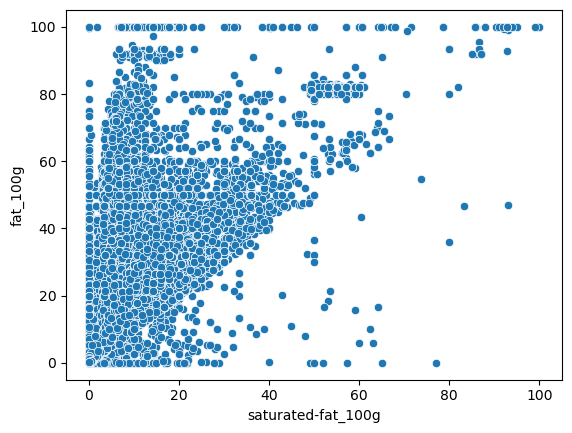

Series([], Name: product_name, dtype: object)


In [86]:
# Tracé d'un nuage de points pour visualiser la relation entre 'saturated-fat_100g' et 'fat_100g'
  #  Gras Saturé / Gras
sns.scatterplot(x=Data_Final['saturated-fat_100g'], y=Data_Final['fat_100g'])

# Affichage du graphique
plt.show()

# Produit 
print(Data_Final[Data_Final['fat_100g'] > 125]['product_name'])

- **Aucun outlier n'est apparent sur l'ensemble des produits.**

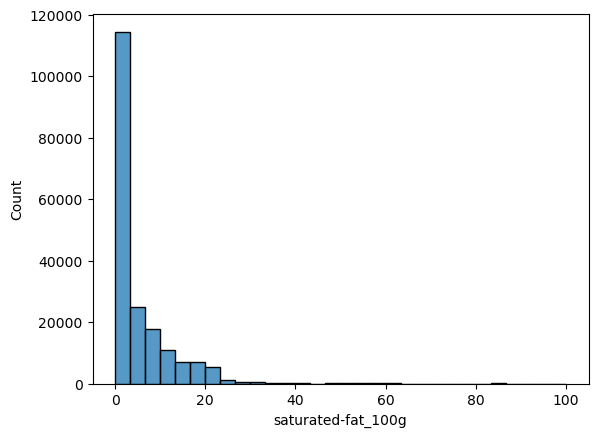

In [87]:
# Affichage de l'histogramme pour évaluer la distribution des valeurs de 'saturated-fat_100g'
sns.histplot(Data_Final['saturated-fat_100g'], bins=30)
plt.show()

- **La distribution n'est pas gaussienne, avec de nombreux zéros et quelques valeurs aberrantes.**

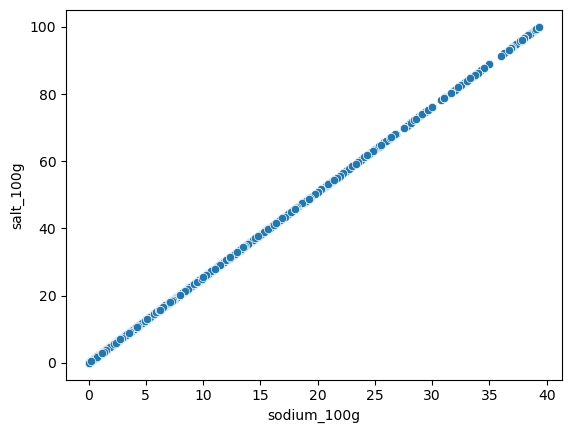

In [88]:
# Tracé du nuage de points pour la relation entre 'sodium_100g' et 'salt_100g'
sns.scatterplot(x=Data_Final['sodium_100g'], y=Data_Final['salt_100g'])
plt.show()

- **On observe des produits avec une teneur en sel très élevée.**

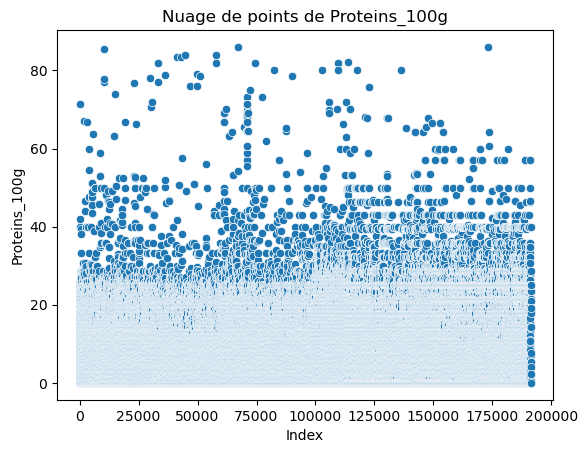

Produits avec plus de 80g de protéines :
['Soja Protein Schokolade' 'Whey 9 Precious Hazelnut' "Garlic 'N Herb"
 'Whey & Soy Protein, Flavored Drink Mix, Vanilla'
 'Free Range Egg White Powder' 'Protein 90 Shake Plus L-Carnitine'
 'Body Shape Protein Shake 90 Plus L-Carnitine' 'Blattgelatine weiss'
 'Shape Protein 90 Cookies & Cream Geschmack' 'WHEY PROTEIN'
 'Impact Whey Unflavourrd' '3K Protein Shake Stracciatella' 'Sirop Fraise']


In [89]:
# Tracé du nuage de points pour la variable 'proteins_100g'
sns.scatterplot(data=Data_Final, x=range(len(Data_Final['proteins_100g'])), y='proteins_100g')
plt.xlabel('Index')
plt.ylabel('Proteins_100g')
plt.title('Nuage de points de Proteins_100g')
plt.show()

# Affichage des noms des produits ayant plus de 80g de protéines
products_above_80g = Data_Final[Data_Final['proteins_100g'] > 80]['product_name'].values
print("Produits avec plus de 80g de protéines :")
print(products_above_80g)

- **Apres vérification sur le site: https://world.openfoodfacts.org/.**
- **il ya une exactitude dans les proportions de produits**

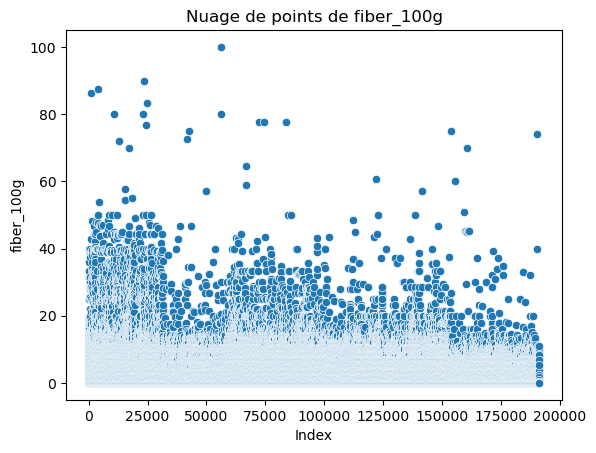

,code,url,product_name,brands_tags,countries_fr,ingredients_text,nutrition_grade_fr,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,Nutrigrade,Nb_Additifs,Huile_De_Palme
895,3760020501518,http://world-fr.openfoodfacts.org/produit/3760020501518/agar-agar-karelea,Agar-agar,"karelea,lea-nature",France,agar-agar (Gracilaria sp.),a,Fish and seafood,177.0,0.00,0.00,0.50,0.00,86.20,0.60,0.03810,0.015000,1,1.0,1.0
4194,3760020504717,http://world-fr.openfoodfacts.org/produit/3760020504717/konjac-cuisine-karelea,Konjac Cuisine,"karelea,lea-nature",France,Poudre de Konjac (50%) ; fibre de chicorée.,a,Unknown,804.0,0.25,0.00,4.85,0.00,87.50,0.75,0.12700,0.050000,1,1.0,1.0
10637,3760087360585,http://world-fr.openfoodfacts.org/produit/3760087360585/psyllium-blond-ethnoscience,Psyllium Blond,ethnoscience,France,Poudre de téguments de psyllium blond (plantago ovata).,a,Unknown,163.0,0.00,0.00,1.80,0.00,80.15,7.80,0.00000,0.000000,1,1.0,1.0
12687,3760116256247,http://world-fr.openfoodfacts.org/produit/3760116256247/tisane-a-sucer-gentiane-citron-bioforez,Tisane à sucer Gentiane Citron,"bioforez,tisane-a-sucer,biopastille",France,"Gomme acacia, gentiane (1,6%), agent de charge: carbonate de magnésium, huile essentielle de citron (0,6%), beurre de cacao (0,3%)",a,Unknown,263.0,0.20,0.20,13.20,0.50,72.10,1.10,0.12700,0.050000,1,1.0,1.0
16963,3256220666398,http://world-fr.openfoodfacts.org/produit/3256220666398/champignons-noirs-deshydrates-u,Champignons noirs déshydratés,u,France,Champignons noirs déshydratés (Auricularia polytricha).,a,Vegetables,746.0,0.80,0.00,0.00,0.00,70.00,6.50,0.10000,0.039370,1,1.0,1.0
22902,9314137003263,http://world-fr.openfoodfacts.org/produit/9314137003263/sf-health-foods-psyllium-husk,SF Health Foods Psyllium Husk,"sf-health-foods,sf-health-foods-psyllium-husk",Australie,Plantago Psyllium,a,Unknown,802.0,3.00,0.00,0.00,0.00,80.00,3.00,0.20066,0.079000,1,1.0,1.0
23537,39978005540,http://world-fr.openfoodfacts.org/produit/0039978005540/premium-guar-gum-bob-s-red-mill,Premium Guar Gum,bob-s-red-mill,États-Unis,Guar gum.,a,Non communiqué,1255.0,0.00,0.00,90.00,0.00,90.00,0.00,0.05080,0.020000,1,1.0,1.0
24154,7894321221427,http://world-fr.openfoodfacts.org/produit/7894321221427/quaker-cereal-mix-iogurte-com-frutas-vermelhas,Quaker Cereal Mix Iogurte com Frutas Vermelhas,"quaker,pepsico",Brésil,"aveia em flocos, açúcar, flocos de arroz, preparado de frutas vermelhas (polpa de maçã, polpa de morango, polpa de framboesa, açúcar invertido, farinha de arroz, amido modificado, aromatizante, acidulante ácido cítrico, estabilizante goma xantana, corante natural carmim), iogurte em pó, aromatizantes, corante natural carmim, estabilizantes (goma guar, carboximetilcelulose sódica)",a,Unknown,1520.0,5.33,1.00,70.00,19.30,76.70,10.30,0.07030,0.027700,1,1.0,1.0
24764,5411788045759,http://world-fr.openfoodfacts.org/produit/5411788045759/agar-agar-lima,Agar-Agar,lima,France,Agar-Agar.,a,Fish and seafood,759.0,0.10,0.00,4.20,0.00,83.30,1.00,0.08000,0.031496,1,1.0,1.0
41886,94776126309,http://world-fr.openfoodfacts.org/produit/0094776126309/juju-halloween-mix-candy-jlm,Juju Halloween Mix Candy,"jlm,lipari-foods-operating-company-llc",États-Unis,"Sugar, corn syrup, contains: less then 2% of the following honey, confectioner's glaze, natural and artificial flavoring, salt, egg whites, mineral oil, coconut oil, carnauba wax, glycerine, artificial coloring: fd&c yellow no. 6, yellow no. 6 lake, yello",b,Non communiqué,1674.0,0.00,0.00,0.00,0.00,72.50,0.00,0.25400,0.100000,2,0.1,1.0


In [90]:
# Tracé du nuage de points pour la variable 'fiber_100g'
sns.scatterplot(data=Data_Final, x=range(len(Data_Final['fiber_100g'])), y='fiber_100g')
plt.xlabel('Index')
plt.ylabel('fiber_100g')
plt.title('Nuage de points de fiber_100g')
plt.show()

# Affichage des noms des produits ayant plus de 60g de Fibre
Data_Final[Data_Final['fiber_100g'] > 60]

- **Aprèes verification, nous avons des valeur atipiques et non des valeurs abérantes.**

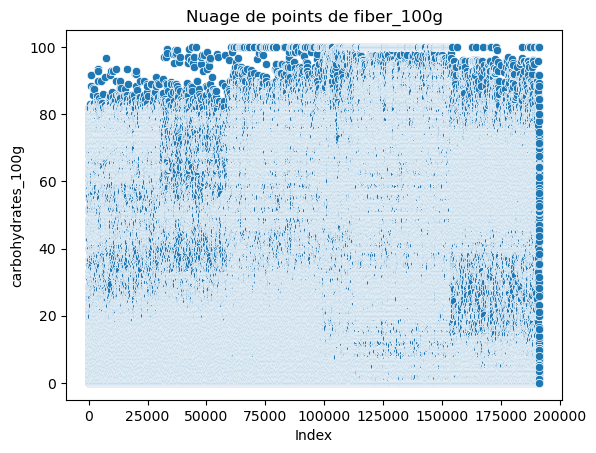

In [91]:
# Tracé du nuage de points pour la variable 'carbohydrates_100g' (Glucide)
sns.scatterplot(data=Data_Final, x=range(len(Data_Final['carbohydrates_100g'])), y='carbohydrates_100g')
plt.xlabel('Index')
plt.ylabel('carbohydrates_100g')
plt.title('Nuage de points de fiber_100g')
plt.show()

- **Aucun outlier n'est apparent sur l'ensemble des produits.**

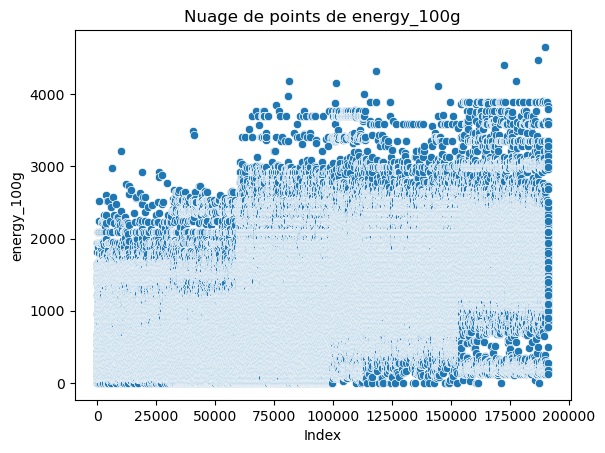

Produits avec plus de 3700 kJ de Energie :
['huile de colza' 'Scotts Food Products, Garlic Oil' 'Colza & Noix'
 'Isio 4' 'Original Ayurveda Ghee' 'Mélange 6 huiles' 'Organic Black Tea'
 'Ths Super Tea, Organic White Tea' 'Rape Seed Oil' 'Peanut Oil'
 'Huile vierge biologique de colza'
 'Aceite de oliva virgen extra &quot;Esencia Andalusí&quot;'
 'Aceite de oliva virgen extra &quot;Esencia Andalusí&quot;'
 'Aceite de oliva virgen extra &quot;Esencia Andalusí&quot;'
 'Aceite de oliva virgen extra &quot;Esencia Andalusí&quot;'
 'Aceite de oliva virgen extra &quot;Esencia Andalusí&quot;'
 'Aceite de oliva virgen extra &quot;Esencia Andalusí&quot;'
 'Aceite de oliva virgen extra &quot;Esencia Andalusí&quot;'
 'Aceite de oliva virgen extra &quot;Esencia Andalusí&quot;'
 'Aceite de oliva virgen extra &quot;Esencia Andalusí&quot;'
 'Aceite de oliva virgen extra ecológico &quot;Verde Mágina&quot;'
 'Aceite de Oliva, acidez ≤ 0,4°' "Confiture de Châtaignes d'Ardèche"
 'Huile de Tournesol NaturSo

,code,url,product_name,brands_tags,countries_fr,ingredients_text,nutrition_grade_fr,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,Nutrigrade,Nb_Additifs,Huile_De_Palme


In [92]:
# Tracé du nuage de points pour la variable 'energy_100g' (Energie)
sns.scatterplot(data=Data_Final, x=range(len(Data_Final['energy_100g'])), y='energy_100g')
plt.xlabel('Index')
plt.ylabel('energy_100g')
plt.title('Nuage de points de energy_100g')
plt.show()


# Affichage des noms des produits ayant plus de 3700 kJ de Energie
products_above_3700kj = Data_Final.loc[Data_Final['energy_100g'] > 3700, 'product_name'].values
print("Produits avec plus de 3700 kJ de Energie :")
print(products_above_3700kj)

# Transformer les produits avec plus de 3700 kJ de Energie en NaN
Data_Final.loc[Data_Final['energy_100g'] > 3700, 'energy_100g'] = np.nan

# Vérifier les changements
Data_Final.loc[Data_Final['energy_100g'] > 3700]

- **L'huile de colza, avec une valeur énergétique de 15481, est notée à 3700kj soit 900kcal sur le site internet. Cela semble être une erreur de saisie.**
- **Cela semble être le cas pour les autres produits également.**
- **Est-ce des colonnes incorrectes ou des produits erronés ?**

In [93]:
# Sélection aléatoire d'un code de produit
random_code = random.choice(Data_Final['code'])
print("Code de produit aléatoire :", random_code)

# Sélection du produit correspondant à ce code
selected_product = Data_Final[Data_Final['code'] == random_code]

# Récupération de la valeur 'energy_100g' pour ce produit
energy_value = selected_product['energy_100g'].values
print("Valeur 'energy_100g' pour ce produit :", energy_value)

Code de produit aléatoire : 54347311848
Valeur 'energy_100g' pour ce produit : [799.]


- **Après une dizaine de tests sur plus de 190000 produits, les résultats ne sont pas toujours précis mais moins aberrants.**
- **Les lignes avec une valeur supérieure à 5000 kJ en énergie ont été remplacées par NaN, et seront imputées par la médiane des valeurs énergétiques en dessous du seuil de 5000 kJ.**

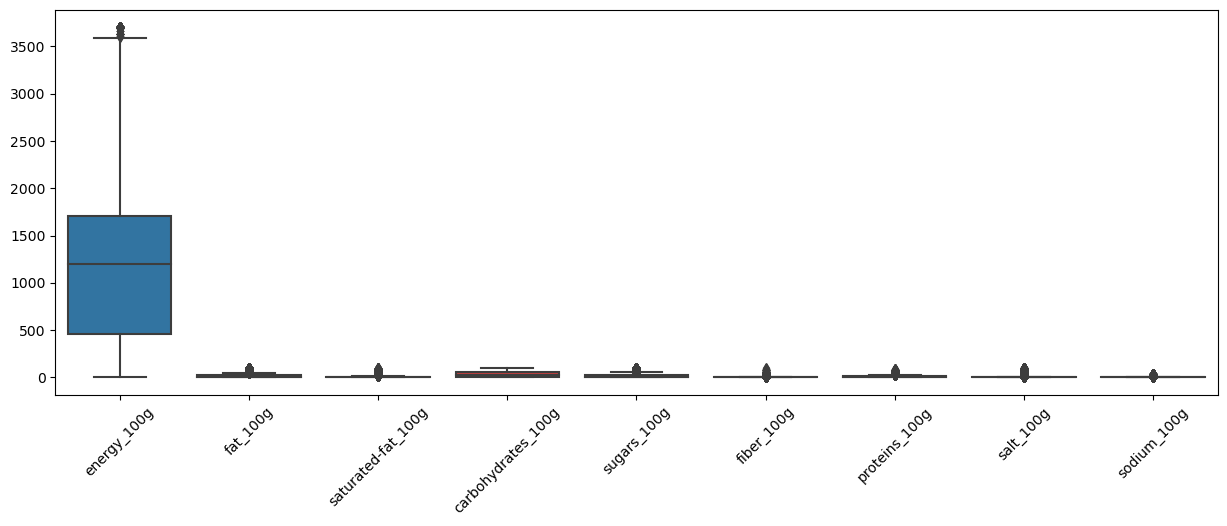

In [94]:
# Boxplot pour les outliers
# Création d'une figure avec une taille spécifique
plt.figure(figsize=(15, 5))

# Création du boxplot pour les colonnes spécifiées
sns.boxplot(data=Data_Final[numeric_columns])

# Rotation des étiquettes de l'axe des x pour une meilleure lisibilité
plt.xticks(rotation=45)

# Affichage du graphique
plt.show()

- **Y a-t-il vraiment une fiabilité et une utilité significatives dans la variable "Energy" malgré la présence d'outliers ?**

In [95]:
Data_Final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191256 entries, 0 to 191255
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   code                191256 non-null  object 
 1   url                 191256 non-null  object 
 2   product_name        191256 non-null  object 
 3   brands_tags         191256 non-null  object 
 4   countries_fr        191256 non-null  object 
 5   ingredients_text    191256 non-null  object 
 6   nutrition_grade_fr  191256 non-null  object 
 7   pnns_groups_2       191256 non-null  object 
 8   energy_100g         191071 non-null  float64
 9   fat_100g            191256 non-null  float64
 10  saturated-fat_100g  191256 non-null  float64
 11  carbohydrates_100g  191256 non-null  float64
 12  sugars_100g         191256 non-null  float64
 13  fiber_100g          191256 non-null  float64
 14  proteins_100g       191256 non-null  float64
 15  salt_100g           191256 non-nul

In [96]:
# Calculer la médiane de la colonne 'energy_100g'
median_energy = Data_Final['energy_100g'].median()

# Remplacer les valeurs NaN par la médiane dans la colonne 'energy_100g'
Data_Final['energy_100g'] = Data_Final['energy_100g'].fillna(median_energy)

# Vérifier les changements
print(Data_Final['energy_100g'].isnull().sum()) 

0


In [97]:
# Activation de l'affichage complet des contenus des cellules
pd.set_option('display.max_colwidth', None)

# Processus de nettoyage
# Création d'une liste contenant les informations de l'étape 11
etape13 = ['Etape 13', "Élimination et Suppression manuelle des outliers (valeurs aberrantes).", Data_Final.shape[1], 
          Data_Final.shape[0], # Nombre total de colonnes avant la suppression
          round((Data_Final.isna().sum().sum())*100/(Data_Final.shape[0]*Data_Final.shape[1]))]   # Calcul du pourcentage de NaN

# Conversion de la liste en DataFrame avec les bonnes colonnes
etape13 = pd.DataFrame([etape13], columns=['Etapes', 'Action', 'Nb_Colonne', 'Nb_Ligne', 'Pourcentage_NaN'])

# Ajout de l'étape au DataFrame df_processus_nettoyage
df_processus_nettoyage = df_processus_nettoyage.append(etape13, ignore_index=True)

# Afficher le DataFrame mis à jour
df_processus_nettoyage

,Etapes,Action,Nb_Colonne,Nb_Ligne,Pourcentage_NaN
0,Etape 1,Ouverture du Fichier,162,320772,76
1,Etape 2,"Suppression des colonnes ayant moins de 50% de leur valeur rempli, sauf 'pnns_groups_1', 'pnns_groups_2'",36,320772,17
2,Etape 3,Suppression des lignes ne contenant pas d'informations sur les ingrédients,36,262768,9
3,Etape 4,Analyse des variables pour les informations générales,31,259380,11
4,Etape 5,Analyse des variables tags,28,259380,12
5,Etape 6,Analyse des variables Igredients,28,259380,12
6,Etape 7,Analyse des variables Données diverses,22,259380,10
7,Etape 8,Analyse des variables apports nutritionnels,21,259206,10
8,Etape 9,Traitement des colonnes textuelles et élimination des produits sans groupe PNNS2,21,259206,4
9,Etape 10,Génération des variables associées à l'EnvironnementScore.,20,259206,3


## III- Analyse Univariée

In [98]:
# Analyse univariée des variables par catégorie de produits.
# Colonnes numériques à analyser
colonnes_numeriques = ['saturated-fat_100g', 'energy_100g', 'sodium_100g','salt_100g', 'proteins_100g', 
                       'sugars_100g','fat_100g', 'carbohydrates_100g', 'fiber_100g']

'''
    Fonction pour obtenir les statistiques (maximum, minimum, moyenne) d'une colonne donnée.
    
    Parameters:
    - colonne: Nom de la colonne à analyser
    - type_stat: Type de statistique à calculer ('max', 'min', 'mean')
    
    Returns:
    - Valeur de la statistique pour la colonne donnée

'''
# Fonction pour obtenir les statistiques par colonne et par type (max, min, moyenne)
def obtenir_statistiques(colonne, type_stat):
    return (
        Data_Final
        .set_index('pnns_groups_2')
        .select_dtypes(exclude='object')
        .reset_index()
        .groupby('pnns_groups_2')[colonne]
        .agg(type_stat)
        .reset_index()
        .sort_values(colonne, ascending=(type_stat == 'max'))
        .iloc[:1]['pnns_groups_2']
        .values[0]
    )

# Calcul des statistiques pour chaque colonne
statistiques_max = [obtenir_statistiques(colonne, 'max') for colonne in colonnes_numeriques]
statistiques_min = [obtenir_statistiques(colonne, 'min') for colonne in colonnes_numeriques]
statistiques_moyenne_max = [obtenir_statistiques(colonne, 'mean') for colonne in colonnes_numeriques]
statistiques_moyenne_min = [obtenir_statistiques(colonne, 'mean') for colonne in colonnes_numeriques]

# Création du DataFrame avec les statistiques
statistiques_array = np.array([statistiques_max, statistiques_min, statistiques_moyenne_max, statistiques_moyenne_min])
statistiques_df = pd.DataFrame(statistiques_array, columns=colonnes_numeriques, index=['Maximum', 'Minimum', 'MoyenneMaximum', 'MoyenneMinimum'])

# Affichage du DataFrame
statistiques_df

,saturated-fat_100g,energy_100g,sodium_100g,salt_100g,proteins_100g,sugars_100g,fat_100g,carbohydrates_100g,fiber_100g
Maximum,Fruit nectars,Fruit nectars,Fruit nectars,Fruit nectars,Fruit nectars,Eggs,Artificially sweetened beverages,Tripe dishes,Fruit nectars
Minimum,Salty and fatty products,Salty and fatty products,Tripe dishes,Tripe dishes,Tripe dishes,Ice cream,Pastries,Pastries,Salty and fatty products
MoyenneMaximum,Fats,Fats,Processed meat,Processed meat,Processed meat,Sweets,Fats,Breakfast cereals,Salty and fatty products
MoyenneMinimum,Fats,Fats,Processed meat,Processed meat,Processed meat,Sweets,Fats,Breakfast cereals,Salty and fatty products


- **La ligne minimale n'est pas très précise car plusieurs produits de différentes catégories peuvent être à zéro, tandis que les moyennes offrent une perspective plus intéressante et représentative.**

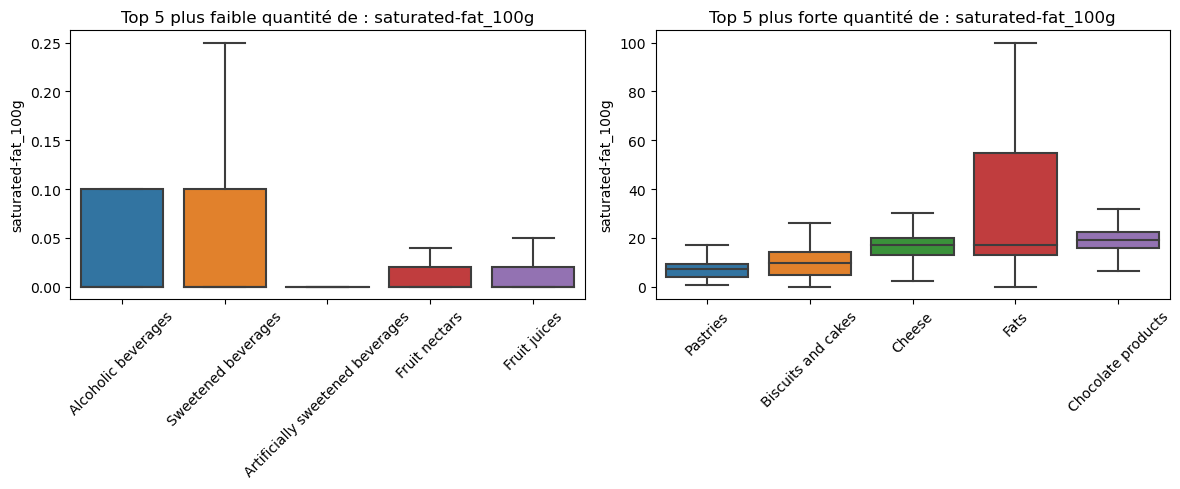

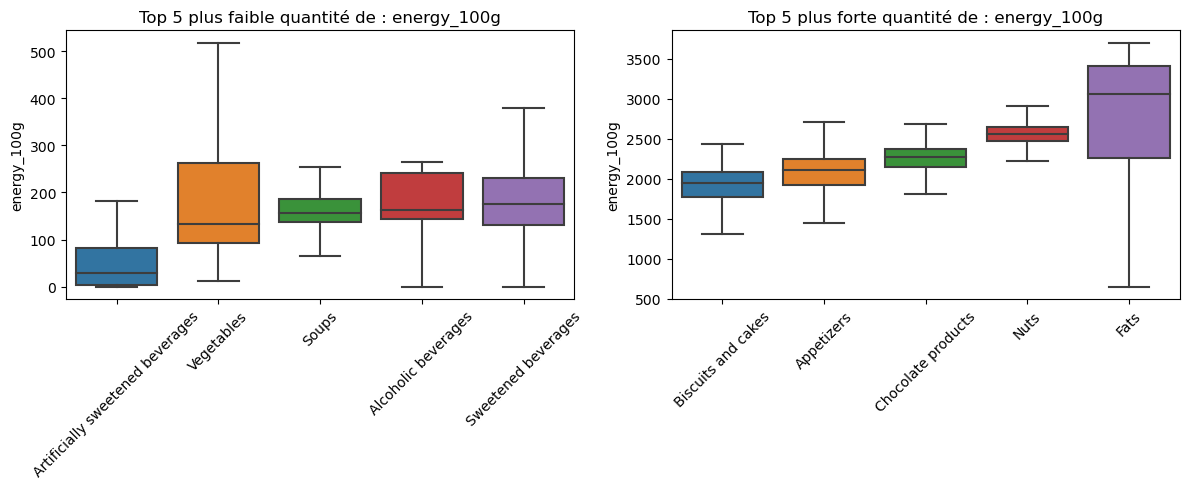

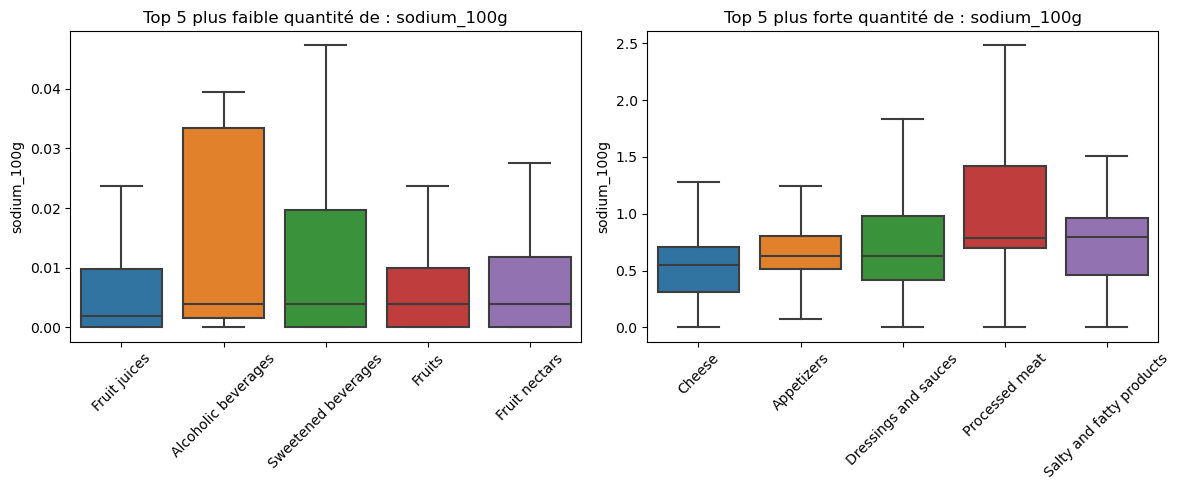

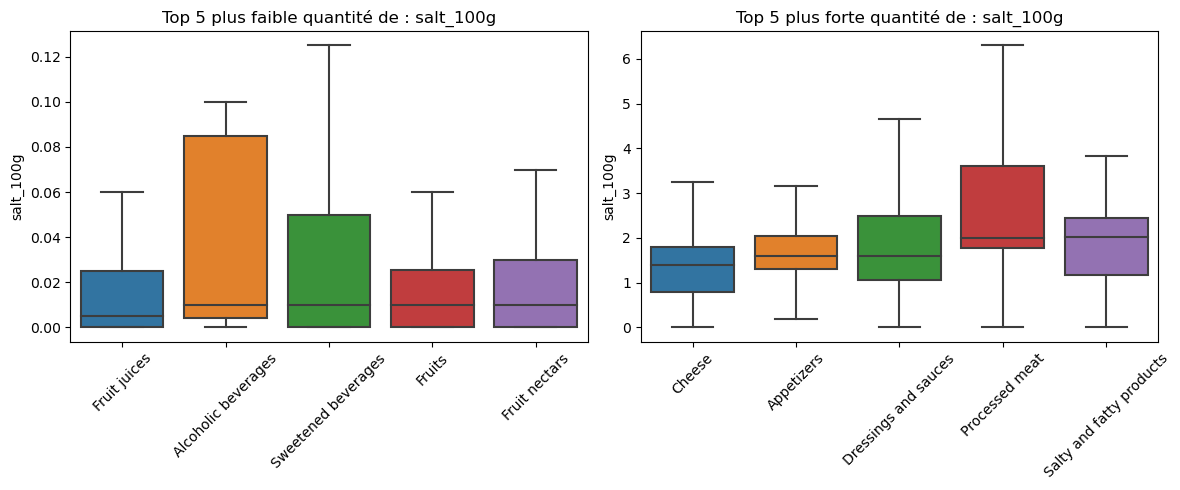

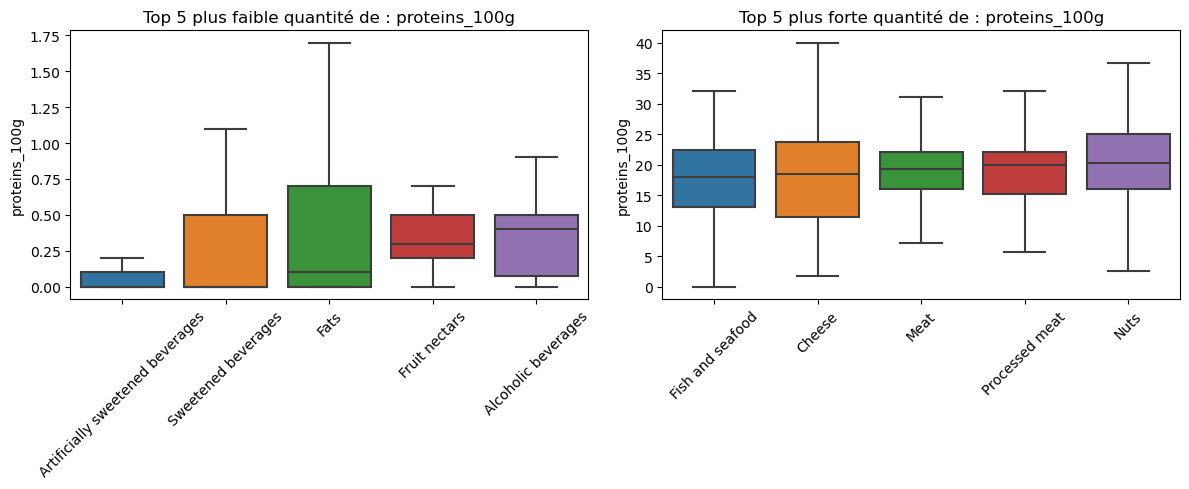

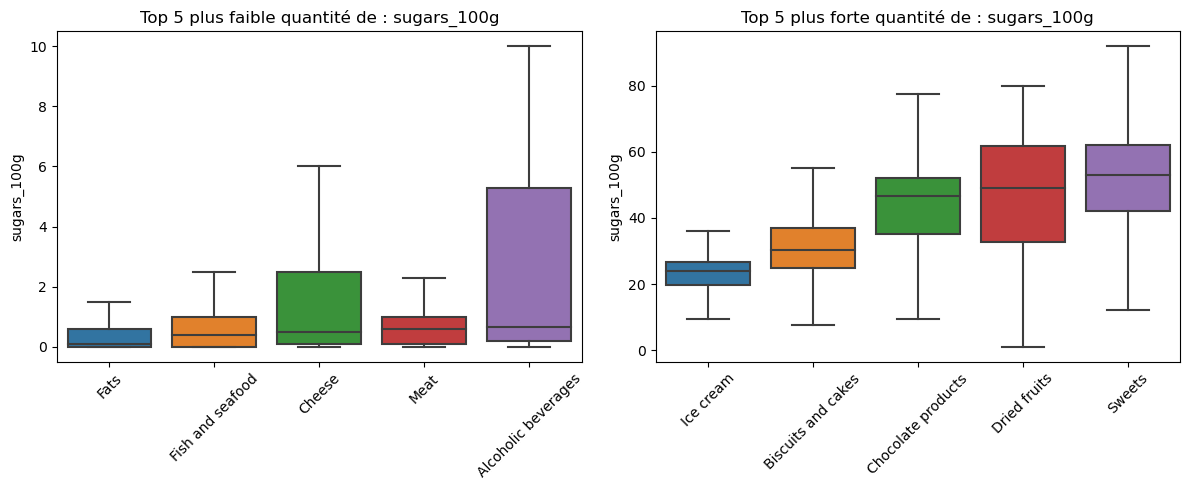

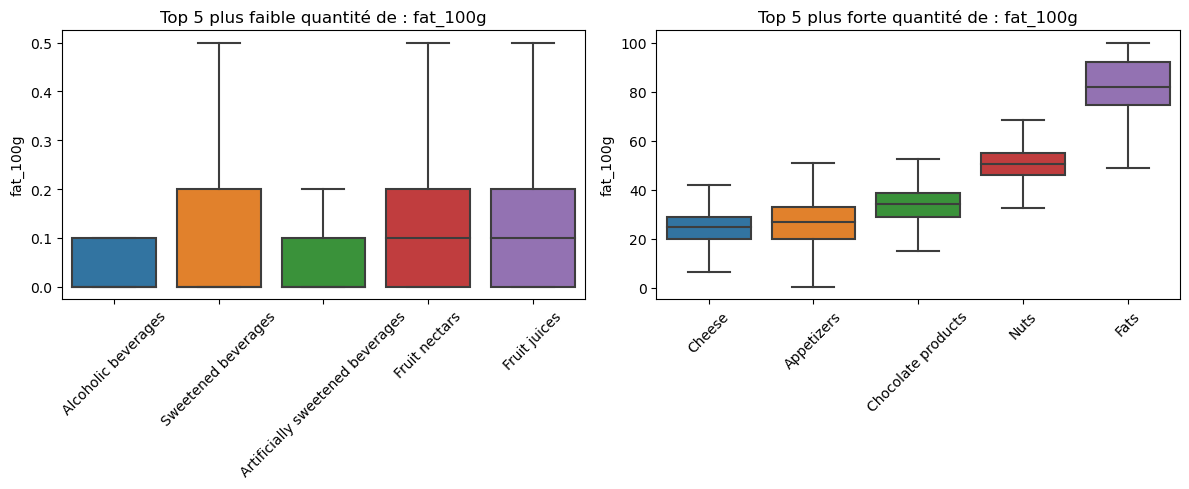

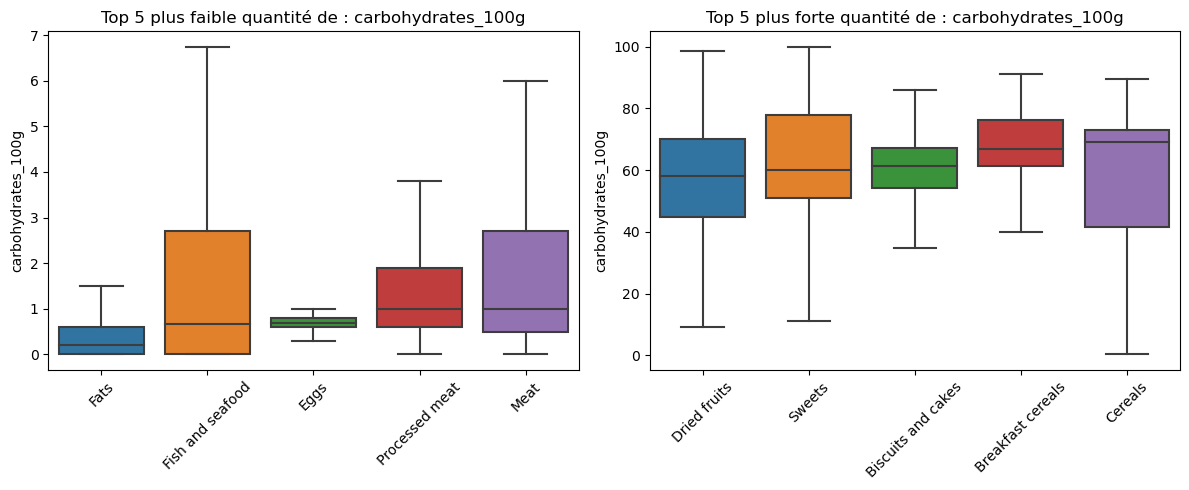

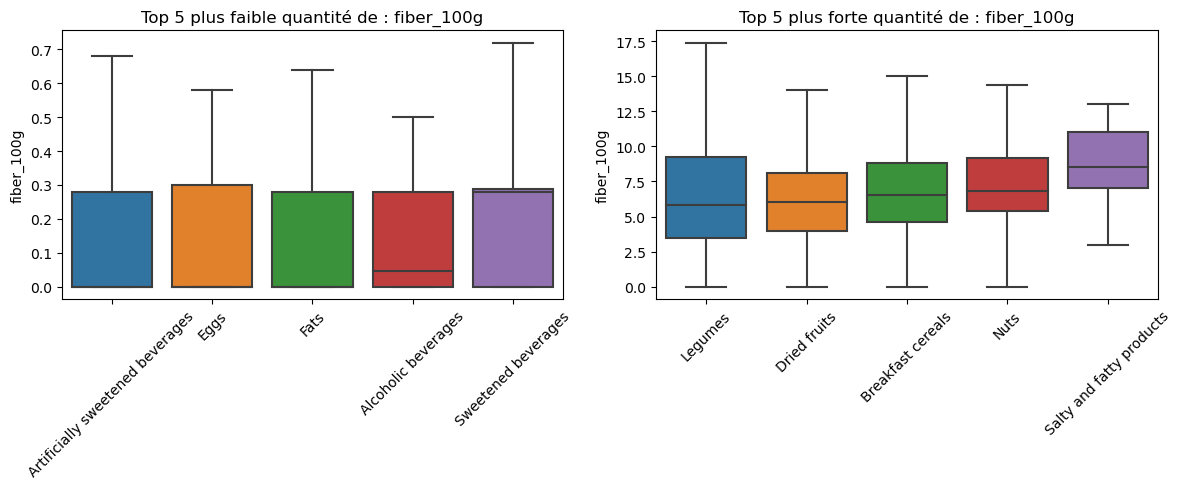

In [99]:
# Boucle sur les colonnes pour créer les graphiques
for colonne in colonnes_numeriques:
    # Sélection des catégories avec les 5 médianes les plus faibles et les 5 médianes les plus élevées
    best = Data_Final.groupby('pnns_groups_2')[colonne].median().sort_values().index[:5]
    flop = Data_Final.groupby('pnns_groups_2')[colonne].median().sort_values().index[-5:]

    # Création de la figure avec deux sous-graphiques
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    # Boxplot pour les 5 médianes les plus faibles
    sns.boxplot(x='pnns_groups_2', y=colonne, data=Data_Final, showfliers=False, order=best, ax=ax1)
    ax1.set_title('Top 5 plus faible quantité de : {}'.format(colonne))
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
    ax1.set_xlabel('')

    # Boxplot pour les 5 médianes les plus élevées
    sns.boxplot(x='pnns_groups_2', y=colonne, data=Data_Final, showfliers=False, order=flop, ax=ax2)
    ax2.set_title('Top 5 plus forte quantité de : {}'.format(colonne))
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
    ax2.set_xlabel('')

    # Affichage des graphiques
    plt.tight_layout()
    plt.show()

##  IV- Analyse Multivariée

In [100]:
# Variables à inclure dans la pairplot
variables = ["energy_100g", "fat_100g", "saturated-fat_100g", "carbohydrates_100g",
             "sugars_100g", "fiber_100g", "proteins_100g", "salt_100g", "sodium_100g",
             "pnns_groups_2", "Nutrigrade"]

# Création de la pairplot avec couleur par catégorie 'pnns_groups_2'
#sns.pairplot(Data_Final[variables], hue='pnns_groups_2')
#plt.show()

- **Les groupes n'ont pas d'influence perceptible sur les ingrédients d'un point de vue visuel..**
- **Il existe une corrélation entre les variables "salt" et "sodium".**
- **On observe une légère relation entre les variables "sucres" et "glucides" ainsi qu'entre "lipides" et "lipides saturés".**

In [101]:
# Analyse de la corrélation des variables numériques
correlation_matrix = Data_Final[variables].select_dtypes(exclude='object').corr()

# Vérification de l'existence de la colonne Nutrigrade dans la matrice de corrélation
if 'Nutrigrade' in correlation_matrix:
    correlation_nutrigrade = correlation_matrix['Nutrigrade'].sort_values(ascending=False)
    print(correlation_nutrigrade)
else:
    print("La colonne 'Nutrigrade' n'est pas présente dans la matrice de corrélation.")

Nutrigrade            1.000000
saturated-fat_100g    0.581403
energy_100g           0.578495
fat_100g              0.529151
sugars_100g           0.434140
carbohydrates_100g    0.226301
sodium_100g           0.113480
salt_100g             0.113480
proteins_100g         0.091042
fiber_100g           -0.151530
Name: Nutrigrade, dtype: float64


- **Les colonnes "fibres", "protéines" et "sel" ne présentent pas de corrélation apparente avec la variable "Nutrigrade", malgré leur importance habituelle dans le calcul de ces classifications nutritionnelles, suggérant ainsi la nécessité d'une analyse plus approfondie.**

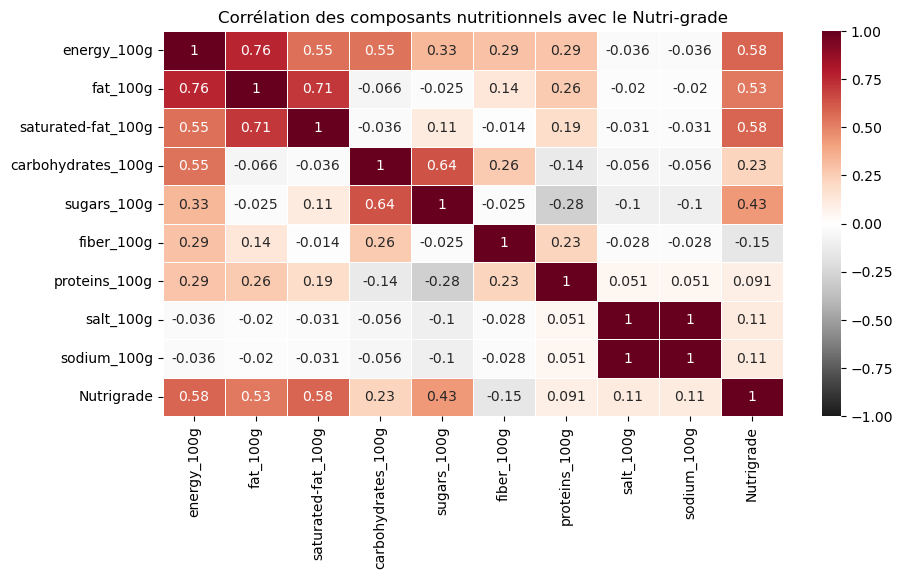

In [102]:
# Création de la heatmap de corrélation
plt.figure(figsize=(10, 5))

# Matrice de corrélation des composants nutritionnels avec le Nutri-score
correlation_matrix = Data_Final[variables].select_dtypes(exclude='object').corr()

# Heatmap avec annotations
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True, linewidths=0.5, cmap='RdGy_r')

# Titre de la heatmap
plt.title("Corrélation des composants nutritionnels avec le Nutri-grade")

# Affichage de la heatmap
plt.show()

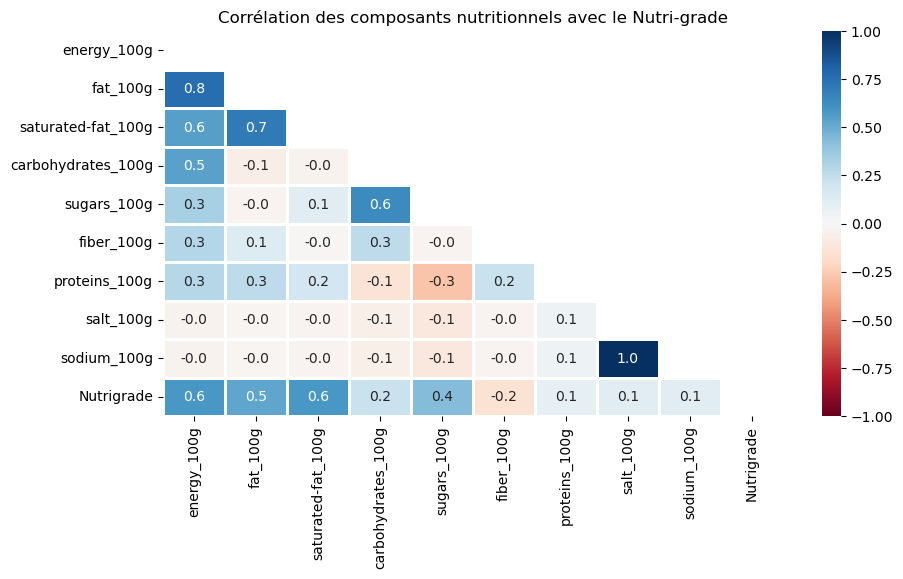

In [103]:
# CARTE DE CORRELATION AMELIOREE

# Création du masque pour la partie supérieure de la heatmap
mask = np.triu(np.ones_like(Data_Final[variables].select_dtypes(exclude='object').corr(), dtype='bool'))

# Heatmap de corrélation avec le masque
plt.figure(figsize=(10, 5))
sns.heatmap(Data_Final[variables].select_dtypes(exclude='object').corr(), mask=mask, center=0,
            cmap="RdBu", linewidths=1,
            annot=True, fmt=".1f", vmin=-1, vmax=1)

# Titre de la heatmap
plt.title("Corrélation des composants nutritionnels avec le Nutri-grade")

# Affichage de la heatmap
plt.show()

- **Une forte corrélation est observée entre les variables "sel" et "sodium".**
- **Une corrélation quasiment parfaite est remarquée entre les variables "gras" et "énergie".**
- **De même, une corrélation modérée est observée entre le "gras saturé" et "énergie", atteignant 60%.**

<Figure size 1000x800 with 0 Axes>

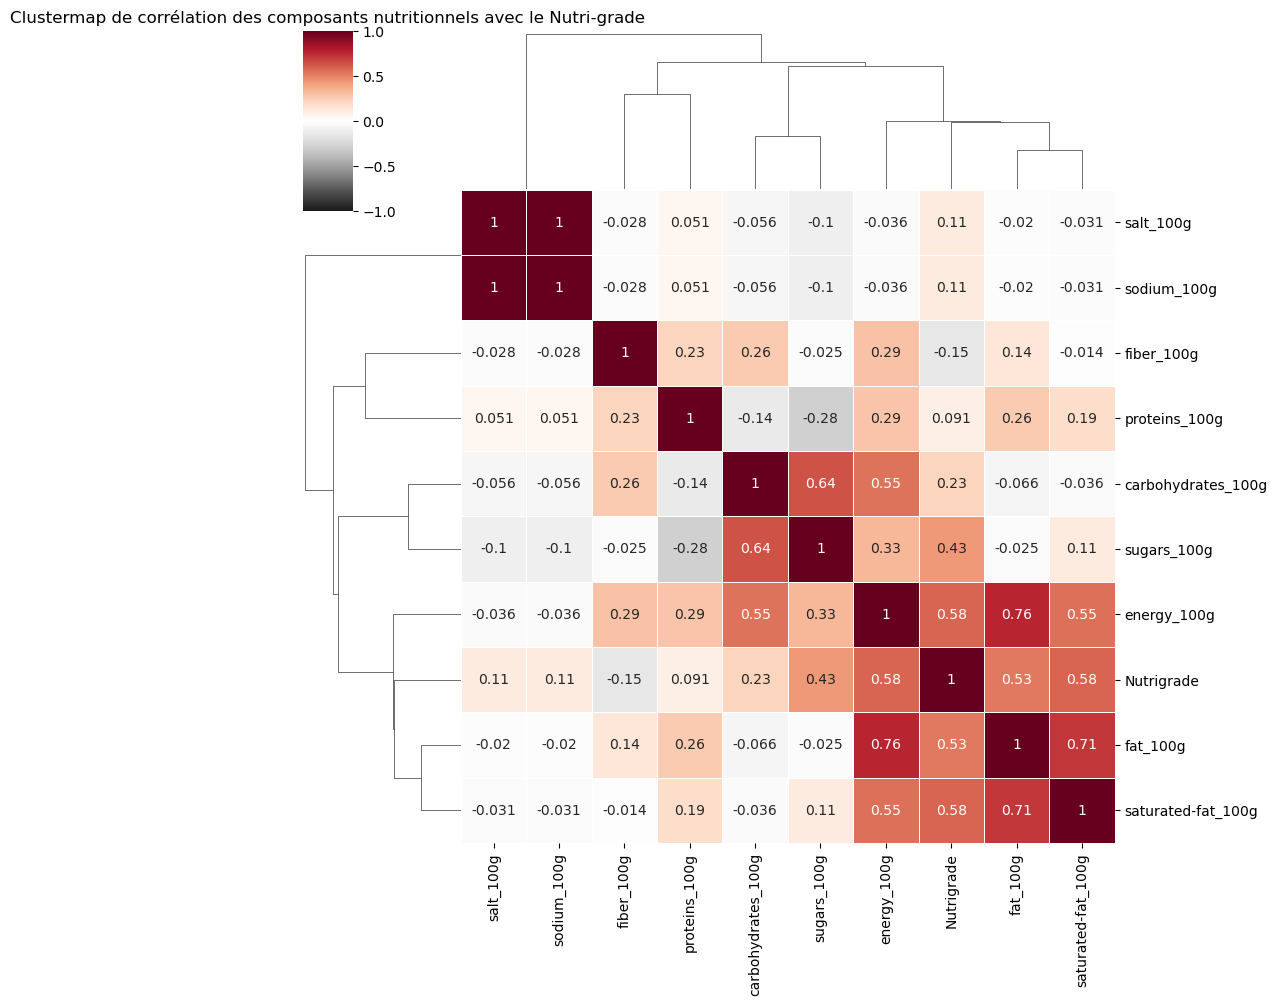

In [104]:
# Clustermap de corrélation
plt.figure(figsize=(10, 8))
clustermap = sns.clustermap(Data_Final[variables].select_dtypes(exclude='object').corr(), 
                            vmin=-1, vmax=1, annot=True, linewidths=0.5, cmap='RdGy_r')

# Titre de la clustermap
plt.title("Clustermap de corrélation des composants nutritionnels avec le Nutri-grade")

# Affichage de la clustermap
plt.show()

- **Une forte corrélation est observée entre les variables "sel" et "sodium".**
- **Une corrélation quasiment parfaite est remarquée entre les variables "gras" et "énergie", ainsi qu'entre le sucre et les glucides**
- **De même, une corrélation modérée est observée entre le "gras saturé" et "énergie", atteignant 60%.**
- **La corrélation entre le sel et le sodium est logique.**

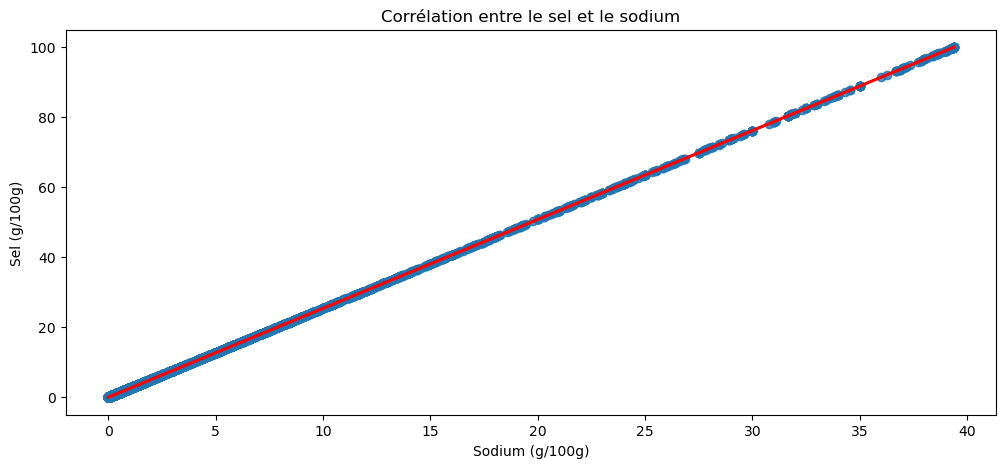

Intercept: -4.131267758999968e-06
Slope: 2.5400096002577572
Coefficient de corrélation (r): 0.9999999917255779


In [105]:
# Etude de la corrélation entre le sel et le sodium
plt.figure(figsize=(12, 5))

# Tracé du nuage de points avec une régression linéaire
sns.regplot(x='sodium_100g', y='salt_100g', data=Data_Final, line_kws={"color": "red"})

# Ajout des labels et du titre
plt.xlabel("Sodium (g/100g)")
plt.ylabel("Sel (g/100g)")
plt.title("Corrélation entre le sel et le sodium")
plt.show()

# Calcul de la régression linéaire et affichage des résultats
slope, intercept, r, p, sterr = scipy.stats.linregress(x=Data_Final['sodium_100g'], y=Data_Final['salt_100g'])
print("Intercept:", intercept)  # Affichage de l'intercept
print("Slope:", slope)  # Affichage de la pente
print("Coefficient de corrélation (r):", r)  # Affichage du coefficient de corrélation

- **_L'intercept (l'ordonnée à l'origine)_ est -4.13. Cela signifie que lorsque la quantité de sodium est nulle (0g/100g), la quantité de sel est proche de cette valeur négative très petite.**


- **_La pente (slope)_ est de 2.54. Cela indique qu'une augmentation d'une unité de sodium (par exemple, de 1g/100g) est associée à une augmentation d'environ 2.54 unités de sel (g/100g).**


- **_Le coefficient de corrélation (r)_ est très proche de 1, soit 0.99. Cela suggère une corrélation extrêmement forte et presque parfaite entre la quantité de sodium et de sel dans les produits. Cela signifie que lorsque la quantité de sodium augmente, la quantité de sel augmente presque exactement dans les mêmes proportions.**


- **_En résumé_, ces résultats suggèrent une forte corrélation linéaire entre la quantité de sodium et la quantité de sel dans les produits, où une augmentation de sodium est presque exactement associée à une augmentation proportionnelle de sel.**

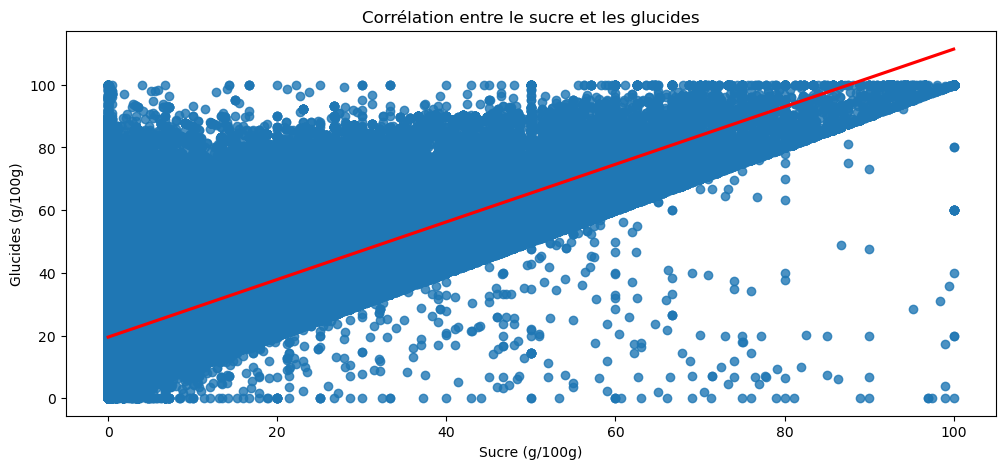

Intercept: 19.509413998418218
Slope: 0.9187408967207505
Coefficient de corrélation (r): 0.6399551319381562


In [106]:
# Etude de la corrélation entre le sucre et les glucides
plt.figure(figsize=(12, 5))

# Tracé du nuage de points avec une régression linéaire
sns.regplot(x='sugars_100g', y='carbohydrates_100g', data=Data_Final, line_kws={"color": "red"})

# Ajout des labels et du titre
plt.xlabel("Sucre (g/100g)")
plt.ylabel("Glucides (g/100g)")
plt.title("Corrélation entre le sucre et les glucides")
plt.show()

# Calcul de la régression linéaire et affichage des résultats
slope, intercept, r, p, sterr = scipy.stats.linregress(x=Data_Final['sugars_100g'], y=Data_Final['carbohydrates_100g'])
print("Intercept:", intercept)  # Affichage de l'intercept
print("Slope:", slope)  # Affichage de la pente
print("Coefficient de corrélation (r):", r)  # Affichage du coefficient de corrélation

- **_L'intercept (l'ordonnée à l'origine)_ est de 19.50. Cela signifie que lorsque la quantité de sucre est nulle (0g/100g), la quantité de glucides est estimée à environ 14.71g/100g.**


- **_La pente (slope)_ est de 0.91. Cela indique qu'une augmentation d'une unité de sucre (par exemple, de 1g/100g) est associée à une augmentation d'environ 0.88 unité de glucides (g/100g).**


- **_Le coefficient de corrélation (r)_ est de  0.63. Cela suggère une corrélation modérée entre la quantité de sucre et la quantité de glucides dans les produits. En d'autres termes, une quantité plus élevée de sucre est généralement associée à une quantité plus élevée de glucides, mais la relation n'est pas parfaite.**


- **_En résumé_, ces résultats indiquent qu'il y a une corrélation modérée entre la quantité de sucre et de glucides dans les produits, où une augmentation de sucre est généralement associée à une augmentation proportionnelle de glucides, bien que la relation ne soit pas absolue.**

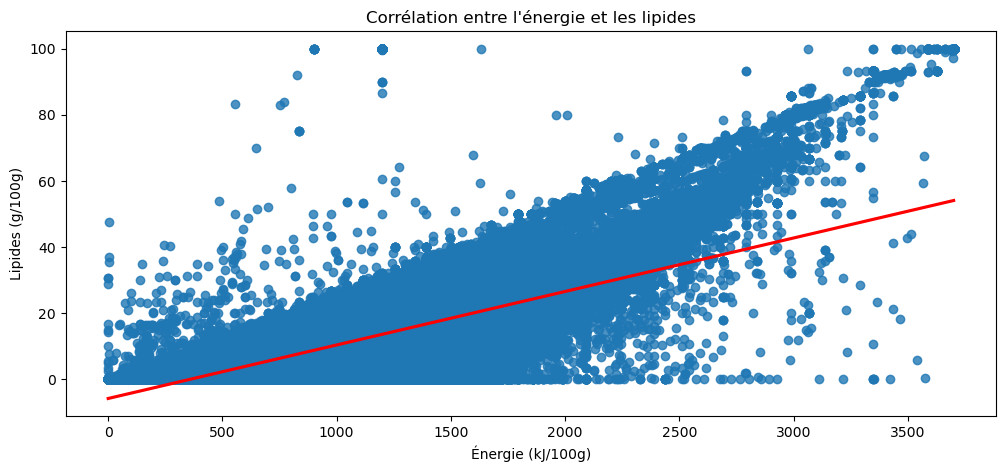

Intercept: -5.747871039929551
Slope: 0.016177304918483668
Coefficient de corrélation (r): 0.7592338902267955


In [107]:
# Etude de la corrélation entre l'énergie et les lipides (gras = fat_100g)
plt.figure(figsize=(12, 5))

# Tracé du nuage de points avec une régression linéaire
sns.regplot(x='energy_100g', y='fat_100g', data=Data_Final, line_kws={"color": "red"})

# Ajout des labels et du titre
plt.xlabel("Énergie (kJ/100g)")
plt.ylabel("Lipides (g/100g)")
plt.title("Corrélation entre l'énergie et les lipides")
plt.show()

# Calcul de la régression linéaire et affichage des résultats
slope, intercept, r, p, sterr = scipy.stats.linregress(x=Data_Final['energy_100g'], y=Data_Final['fat_100g'])
print("Intercept:", intercept)  # Affichage de l'intercept
print("Slope:", slope)  # Affichage de la pente
print("Coefficient de corrélation (r):", r)  # Affichage du coefficient de corrélation

- **_L'intercept (l'ordonnée à l'origine)_ est de -5.74. Cela signifie que lorsque la quantité d'énergie est nulle (0 kJ/100g), la quantité de lipides est estimée à environ -5.48g/100g. Cela peut sembler non-sens dans ce contexte car la quantité d'énergie ne peut pas être nulle.**


- **_La pente (slope)_ est de 0.01. Cela indique qu'une augmentation d'une unité de quantité d'énergie (par exemple, de 1 kJ/100g) est associée à une augmentation d'environ 0.017 unité de lipides (g/100g).**


- **_Le coefficient de corrélation (r)_ est de 0.75. Cela suggère une corrélation significative et positive entre la quantité d'énergie et la quantité de lipides dans les produits. En d'autres termes, une quantité plus élevée d'énergie est généralement associée à une quantité plus élevée de lipides.**


- **_En résumé_, ces résultats indiquent qu'il y a une corrélation positive significative entre la quantité d'énergie et la quantité de lipides dans les produits alimentaires, où une augmentation de l'énergie est généralement associée à une augmentation proportionnelle de lipides.**

La formule pour calculer l'énergie en kilojoules (kJ) dans les aliments est basée sur la quantité de macronutriments (protéines, glucides et lipides) présents. Voici la formule générale :

\[ {Énergie (kJ)} = 4 {Protéines (g)} + 4 {Glucides (g)} + 9 {Lipides (g)} \]

- Les protéines et les glucides fournissent environ 4 kilocalories (ou Calories) par gramme.
- Les lipides fournissent environ 9 kilocalories (ou Calories) par gramme.

Pour convertir des calories en kilojoules (1 calorie = 4.184 kilojoules), on peut utiliser cette formule :

\[ {Énergie (kJ)} = (4 {Protéines (g)} + 4 {Glucides (g)} + 9 {Lipides (g)})  4.184 \]

En général, les étiquettes nutritionnelles sur les produits alimentaires fournissent l'énergie en kilojoules par portion. Cela peut être calculé en utilisant les valeurs fournies pour les protéines, les glucides et les lipides dans chaque portion du produit.

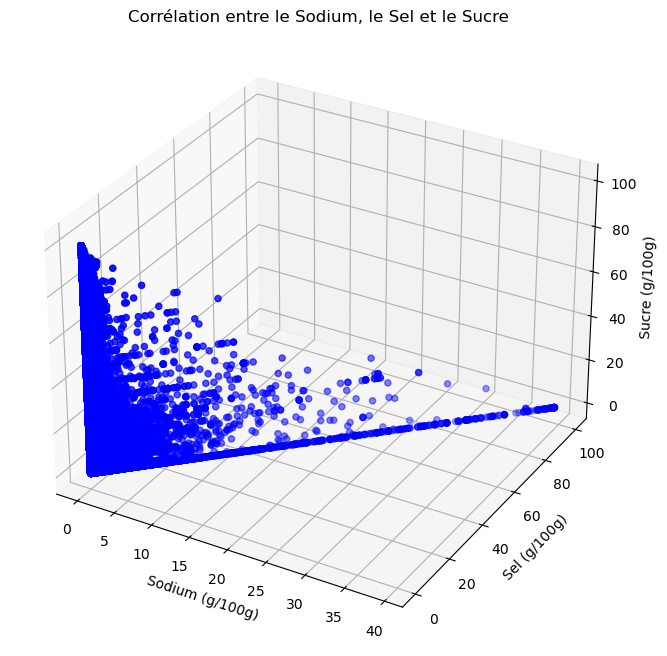

In [108]:
from mpl_toolkits.mplot3d import Axes3D

# Création des données pour les variables
x = Data_Final['sodium_100g']
y = Data_Final['salt_100g']
z = Data_Final['sugars_100g']

# Création de la figure 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Tracé du nuage de points en 3D
ax.scatter(x, y, z, c='b', marker='o')

# Ajout des labels des axes et du titre
ax.set_xlabel('Sodium (g/100g)')
ax.set_ylabel('Sel (g/100g)')
ax.set_zlabel('Sucre (g/100g)')
ax.set_title('Corrélation entre le Sodium, le Sel et le Sucre')

# Affichage du graphique
plt.show()

In [109]:
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from ipywidgets import interact

# Création des données pour les variables
x = Data_Final['energy_100g']
y = Data_Final['fat_100g']
z = Data_Final['carbohydrates_100g']

def plot_3d_graph(elev, azim):
    # Création de la figure 3D
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Tracé du nuage de points en 3D
    ax.scatter(x, y, z, c='b', marker='o')

    # Ajout des labels des axes et du titre
    ax.set_xlabel('Énergie (kJ/100g)')
    ax.set_ylabel('Lipides (g/100g)')
    ax.set_zlabel('Glucides (g/100g)')
    ax.set_title('Corrélation entre l\'énergie, les lipides et les glucides')

    # Réglage de l'angle de vue
    ax.view_init(elev=elev, azim=azim)

    # Affichage du graphique
    plt.show()

# Création de l'interface interactive avec ipywidgets
interact(plot_3d_graph, elev=widgets.FloatSlider(min=-90, max=90, step=1, value=30, description='Elevation'),
         azim=widgets.FloatSlider(min=-180, max=180, step=1, value=30, description='Azimuth'))

interactive(children=(FloatSlider(value=30.0, description='Elevation', max=90.0, min=-90.0, step=1.0), FloatSl…

<function __main__.plot_3d_graph(elev, azim)>

In [110]:
# Activation de l'affichage complet des contenus des cellules
pd.set_option('display.max_colwidth', None)

# Processus de nettoyage
# Création d'une liste contenant les informations de l'étape 11
etape13 = ['Etape 13', "Analyse univariée et multivariée.", Data_Final.shape[1], 
          Data_Final.shape[0], # Nombre total de colonnes avant la suppression
          round((Data_Final.isna().sum().sum())*100/(Data_Final.shape[0]*Data_Final.shape[1]))]   # Calcul du pourcentage de NaN

# Conversion de la liste en DataFrame avec les bonnes colonnes
etape13 = pd.DataFrame([etape13], columns=['Etapes', 'Action', 'Nb_Colonne', 'Nb_Ligne', 'Pourcentage_NaN'])

# Ajout de l'étape au DataFrame df_processus_nettoyage
df_processus_nettoyage = df_processus_nettoyage.append(etape13, ignore_index=True)

# Afficher le DataFrame mis à jour
df_processus_nettoyage

,Etapes,Action,Nb_Colonne,Nb_Ligne,Pourcentage_NaN
0,Etape 1,Ouverture du Fichier,162,320772,76
1,Etape 2,"Suppression des colonnes ayant moins de 50% de leur valeur rempli, sauf 'pnns_groups_1', 'pnns_groups_2'",36,320772,17
2,Etape 3,Suppression des lignes ne contenant pas d'informations sur les ingrédients,36,262768,9
3,Etape 4,Analyse des variables pour les informations générales,31,259380,11
4,Etape 5,Analyse des variables tags,28,259380,12
5,Etape 6,Analyse des variables Igredients,28,259380,12
6,Etape 7,Analyse des variables Données diverses,22,259380,10
7,Etape 8,Analyse des variables apports nutritionnels,21,259206,10
8,Etape 9,Traitement des colonnes textuelles et élimination des produits sans groupe PNNS2,21,259206,4
9,Etape 10,Génération des variables associées à l'EnvironnementScore.,20,259206,3


## V- ACP, ou notre PCA !

In [111]:
Data_Final.head(2)

,code,url,product_name,brands_tags,countries_fr,ingredients_text,nutrition_grade_fr,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,Nutrigrade,Nb_Additifs,Huile_De_Palme
0,3021761203186,http://world-fr.openfoodfacts.org/produit/3021761203186/pom-pote-pomme-mure-materne,Pom'Pote Pomme Mûre,materne,France,"Pomme 78.6%, mûre 15.2%, sucre, arôme naturel mûre , antioxydant : acide ascorbique.",a,Fruits,313.0,0.60,0.2,16.00,15.1,1.4,0.4,0.00762,0.003,1,1.0,1.0
1,89397108117,http://world-fr.openfoodfacts.org/produit/0089397108117/organic-spaghetti-macaroni-product-bella-terra,"Organic Spaghetti, Macaroni Product",bella-terra,États-Unis,Certified organic hard amber durum wheat semolina,a,Non communiqué,1418.0,1.79,0.0,73.21,0.0,3.6,12.5,0.00000,0.000,1,1.0,1.0


In [112]:
Data_Final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191256 entries, 0 to 191255
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   code                191256 non-null  object 
 1   url                 191256 non-null  object 
 2   product_name        191256 non-null  object 
 3   brands_tags         191256 non-null  object 
 4   countries_fr        191256 non-null  object 
 5   ingredients_text    191256 non-null  object 
 6   nutrition_grade_fr  191256 non-null  object 
 7   pnns_groups_2       191256 non-null  object 
 8   energy_100g         191256 non-null  float64
 9   fat_100g            191256 non-null  float64
 10  saturated-fat_100g  191256 non-null  float64
 11  carbohydrates_100g  191256 non-null  float64
 12  sugars_100g         191256 non-null  float64
 13  fiber_100g          191256 non-null  float64
 14  proteins_100g       191256 non-null  float64
 15  salt_100g           191256 non-nul

In [113]:
# Création de X en sélectionnant les colonnes pertinentes
X = Data_Final[["energy_100g", "fat_100g", "saturated-fat_100g", "carbohydrates_100g","sugars_100g", "fiber_100g", 
               "proteins_100g", "salt_100g", "sodium_100g"]]

# Création de y à partir de la colonne "Nutrigrade"
y = Data_Final["Nutrigrade"]

In [114]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalisation des données avec MinMaxScaler
scaler_minmax = MinMaxScaler()
X_normalized = scaler_minmax.fit_transform(X)

# Standardisation des données normalisées
scaler_standard = StandardScaler()
X_scaled = scaler_standard.fit_transform(X_normalized)

# Affichage de la forme de X_scaled
print(X_scaled.shape)

(191256, 9)


In [115]:
# On espère avoir une moyenne à 0 et un écart type à 1 :

idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :] 

,0,1,2,3,4,5,6,7,8
mean,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### 1- PCA

In [116]:
from sklearn.decomposition import PCA

# Nous allons travailler que sur les 6 premières composantes :
n_components = 6

# Initialisation de l'objet PCA avec les 6 premières composantes spécifiée
pca = PCA(n_components = n_components)

# Réduction de dimensionnalité et transformation des données (On l'entraine)
X_pca = pca.fit_transform(X_scaled)

# Dimensions du nouveau jeu de données après PCA
X_pca.shape

(191256, 6)

Intéressons nous maintenant à la variance captée par chaque nouvelle composante. Grace à scikit-learn on peut utiliser l'attribut explained_variance_ratio_ :

In [117]:
pca.explained_variance_ratio_

array([0.29495749, 0.2311622 , 0.19543919, 0.1330851 , 0.07149293,
       0.04296458])

- **Ici la 1ère composante capte 29% de la variance de nos données initiales, la 2ème 23% etc etc.**

- **La 4éme et la 5ème ne sont pas vraiment utile.**

In [118]:
# Enregistrons cela dans une variable :

scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([29.5 , 23.12, 19.54, 13.31,  7.15,  4.3 ])

Les 2 premières composantes captent donc 29+23 = 53% de la variance, les 3 premières 29+23+18 = 72% de la variance etc etc.

Dans le jargon, cela s'appelle une somme cumulée. Et pour faire une somme cumulée numpy dispose de la fonction cumsum :

In [119]:
scree_cum = scree.cumsum().round()
scree_cum

array([30., 53., 72., 85., 93., 97.])

In [120]:
# Définisons ensuite une variable avec la liste de nos composantes :

x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6]

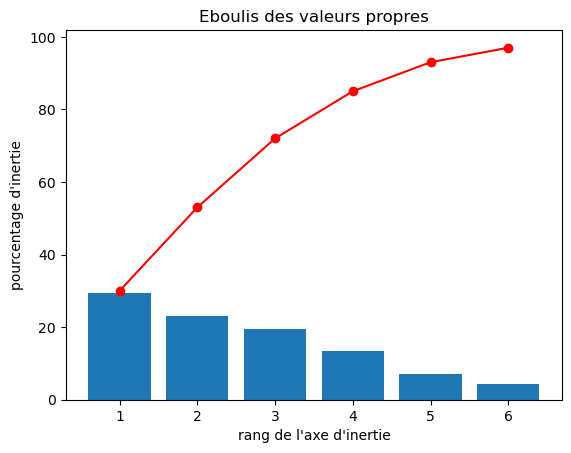

In [121]:
# On peut enfin l'afficher de façon graphique :

plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

- **On a en bleu la variance de chaque nouvelle composante, et en rouge la variance cumulée.**

- **On voit ici que près de 80% de la variance est comprise dans les 3 premières composantes, et près de 90% dans les 4 premières.**

- **L'éboulis suggère qu'il est pertinent de conserver les deux premiers plans.**

.

### 2- Intéressons nous maintenant à nos fameuses composantes.

- **La formule de calcul de composantes nous est donnée par l'attribut components_. Cette variable est généralement nommée pcs :**

In [122]:
# Création d'un DataFrame à partir des composantes principales (pcs)
# Les colonnes du DataFrame seront les colonnes de X
# Les index seront nommés "F{i}" où i est un élément de x_list
# Les valeurs seront arrondies à 2 décimales

features = X.columns
pcs = pd.DataFrame(
    pca.components_,           # Les composantes principales de l'analyse PCA
    columns=features,          # Les noms des colonnes sont ceux de X
    index=[f"F{i}" for i in x_list]  # Index nommés F1, F2, F3, etc. en fonction de x_list
).round(2)                      # Arrondir les valeurs à 2 décimales

In [123]:
pcs

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
F1,0.58,0.49,0.43,0.28,0.23,0.21,0.19,-0.12,-0.12
F2,0.07,0.23,0.18,-0.26,-0.30,0.02,0.27,0.58,0.58
F3,0.11,-0.23,-0.19,0.54,0.49,0.06,-0.29,0.38,0.38
F4,0.03,-0.19,-0.39,0.18,-0.23,0.73,0.44,-0.04,-0.04
F5,-0.07,0.23,0.10,-0.16,-0.20,0.55,-0.75,0.02,0.02
F6,-0.39,-0.29,0.53,-0.28,0.51,0.34,0.19,0.02,0.02


De mieux en mieux !

"ATTENTION" : Nous avons arrondi les résultats pour simplifier l'analyse

- **Dans certains cas, on voudra afficher ce dataframe comme cela :**

In [124]:
pcs.T

,F1,F2,F3,F4,F5,F6
energy_100g,0.58,0.07,0.11,0.03,-0.07,-0.39
fat_100g,0.49,0.23,-0.23,-0.19,0.23,-0.29
saturated-fat_100g,0.43,0.18,-0.19,-0.39,0.10,0.53
carbohydrates_100g,0.28,-0.26,0.54,0.18,-0.16,-0.28
sugars_100g,0.23,-0.30,0.49,-0.23,-0.20,0.51
fiber_100g,0.21,0.02,0.06,0.73,0.55,0.34
proteins_100g,0.19,0.27,-0.29,0.44,-0.75,0.19
salt_100g,-0.12,0.58,0.38,-0.04,0.02,0.02
sodium_100g,-0.12,0.58,0.38,-0.04,0.02,0.02


- **Et pour une représentation plus visuelle, comme cela :**

<AxesSubplot:>

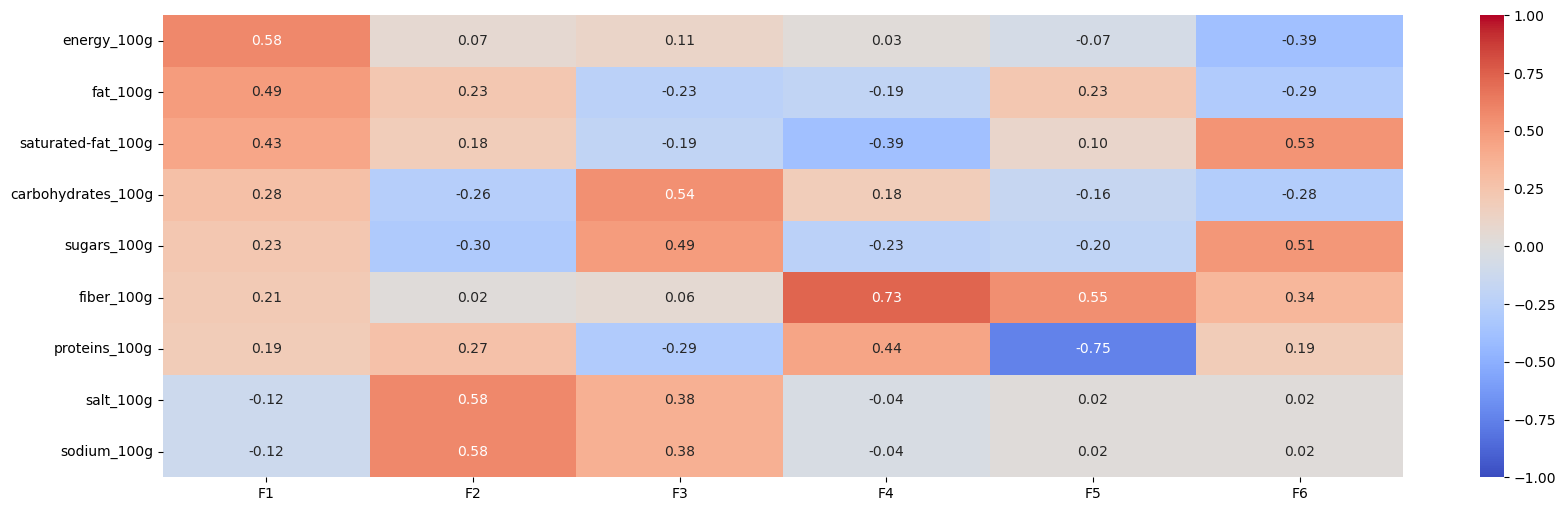

In [125]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

### 3- Graphique de Correlation

- **Définissons nos axes x et y. Nous allons utiliser les 2 premières composantes. Comme - en code - on commence à compter à partir de 0, cela nous donne :**

In [126]:
x, y = 0,1

Pour la partie graphique :

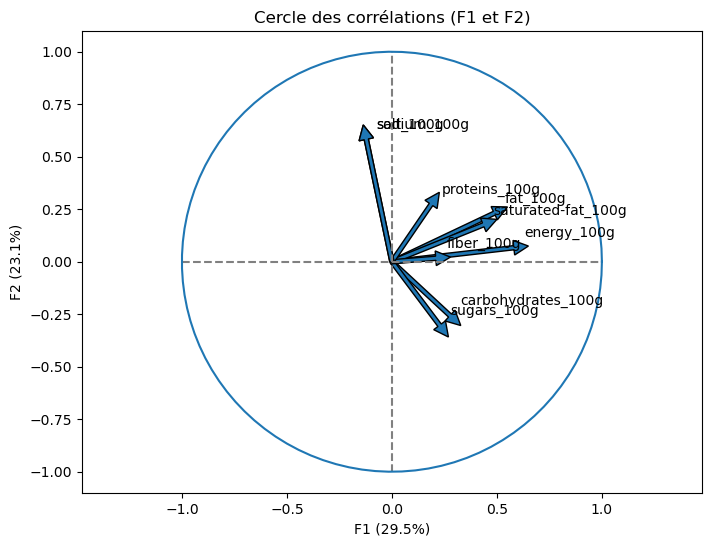

In [127]:
fig, ax = plt.subplots(figsize=(8, 6))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             features[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

- **Il y a une corrélation entre les variables "sel" et "sodium".**
- **Les variables "gras" et "gras saturé" présentent une corrélation.**
- **Une corrélation est observée entre les variables "sucres" et "glucides".**

Les lignes horizontales et verticales tracées représentent les axes des composantes principales. Elles indiquent la proportion de variance expliquée par chaque composante principale.

Dans ce graphique, on peut voir les variables "Salt" et "Sodium" sont fortement négativement corrélées avec la prémière composante principale (PC1). tandis que les variables "gras", "gras saturé" et "energie" sont corrélées positivement avec la deuxième composante principale (PC2),

Les variables "proteine", "fibre", "glucide" et "sucre" ont une corrélation plus faible avec les composantes principales, car leurs flèches sont plus courtes et plus proches du centre du cercle.

Cette visualisation est utile pour identifier les variables qui ont une influence importante sur les composantes principales, et peut aider à comprendre les relations entre les variables dans les données analysées.

In [128]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(8, 6))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

Essayons cette fonction pour F1 et F2

- **"ATTENTION"  Encore une fois Pour F1 et F2 il faut bien préciser 0 et 1**

In [129]:
x_y = (0,1)
x_y

(0, 1)

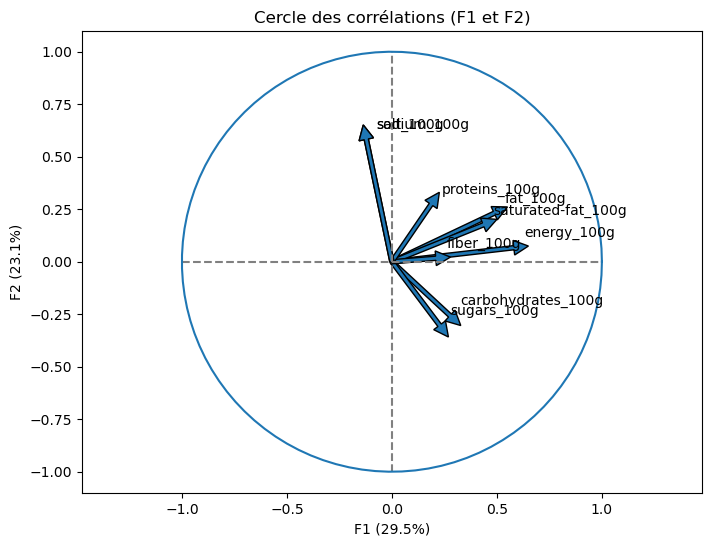

In [130]:
# Essayons cette fonction pour F1 et F2

correlation_graph(pca, x_y, features)

Les lignes horizontales et verticales tracées représentent les axes des composantes principales. Elles indiquent la proportion de variance expliquée par chaque composante principale.

Dans ce graphique, on peut voir les variables "Salt" et "Sodium" sont fortement corrélées négativement avec la première composante principale (PC1). tandis que les variables "gras", "gras saturé" et "energie" sont corrélées positivement avec la deuxième composante principale (PC2),

Les variables "proteine", "fibre", "glucide" et "sucre" ont une corrélation plus faible avec les composantes principales, car leurs flèches sont plus courtes et plus proches du centre du cercle.

Cette visualisation est utile pour identifier les variables qui ont une influence importante sur les composantes principales, et peut aider à comprendre les relations entre les variables dans les données analysées.

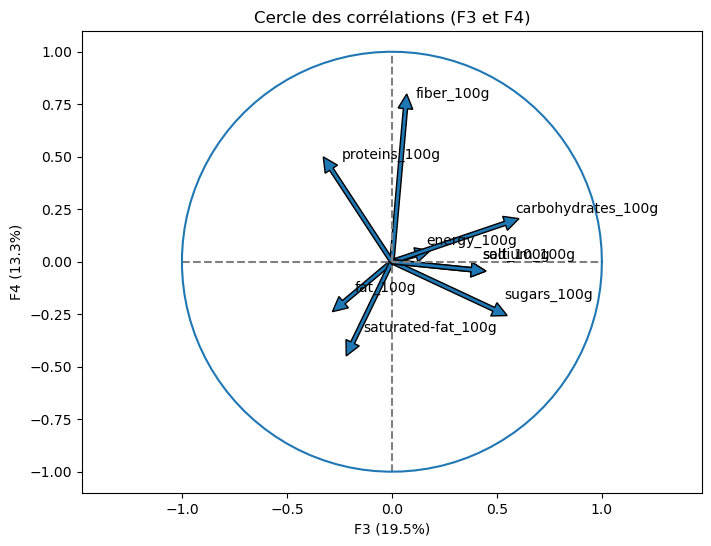

In [131]:
# Essayons pour F3 et F4 : # x_y = 1,2

correlation_graph(pca, (2,3), features)

Les lignes horizontales et verticales tracées représentent les axes des composantes principales. Elles indiquent la proportion de variance expliquée par chaque composante principale.

Dans ce graphique, on peut voir les variables "fibre" et "proteine" sont corrélées avec la troixième composante principale (PC3). Par ailleurs, la variable "fibre" est fortement corrélée positivement à la composante (PC3) et la variable "proteine" est corrélée négativement à la composante (PC3).

tandis que les variables "glucide" et "sucre" sont corrélées avec la quatrième composante principale (PC4). Par ailleurs, la variable "sucre" est corrélée négativement à la composante (PC4). 

Les variables "gras", "fgras saturé", "energie", "sel" et "sodium" ont une corrélation plus faible avec les composantes principales, car leurs flèches sont plus courtes et plus proches du centre du cercle.

Cette visualisation est utile pour identifier les variables qui ont une influence importante sur les composantes principales, et peut aider à comprendre les relations entre les variables dans les données analysées.

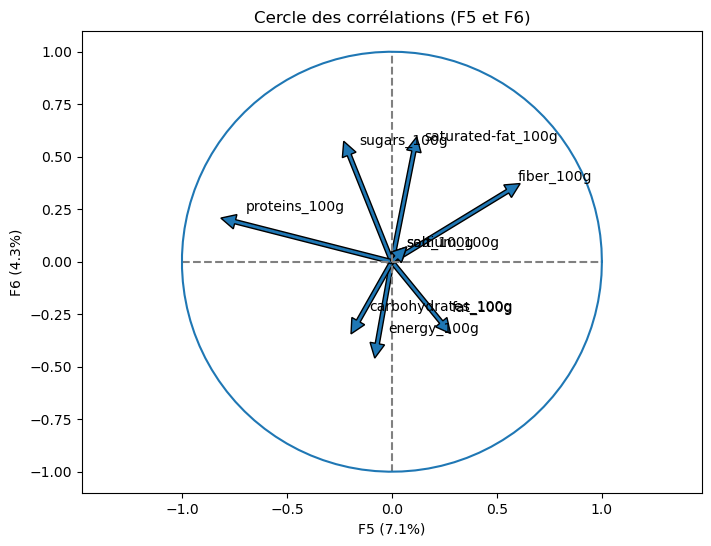

In [132]:
# Essayons pour F5 et F6 :

correlation_graph(pca, (4,5), features)

### 4- Projection

- **Travaillons maintenant sur la projection de nos dimensions. Tout d'abord calculons les coordonnées de nos individus dans le nouvel espace :**

In [133]:
X_proj = pca.transform(X_scaled)
X_proj[:5]

array([[-1.66970313, -0.85475302, -0.15232391, -0.37237884,  0.42890898,
         0.21872845],
       [-0.00698499, -0.60850537,  0.31653152,  1.27050934, -0.67887255,
        -0.89131483],
       [-1.07185701, -0.08800424, -0.62195616,  1.07644941,  0.81906233,
         0.36575317],
       [-2.14464946, -0.57130051, -0.71885302, -0.37262223,  0.51737968,
         0.07131685],
       [-1.50862601, -0.40423323, -0.53316908,  0.55738668,  0.59343939,
         0.18434034]])

- **Rappelons que :**

In [134]:
x_y

(0, 1)

In [135]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[8,6], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

- **Essayons la version simple avec F1 et F2, les couleurs correspondent au niveau de difficulté :**

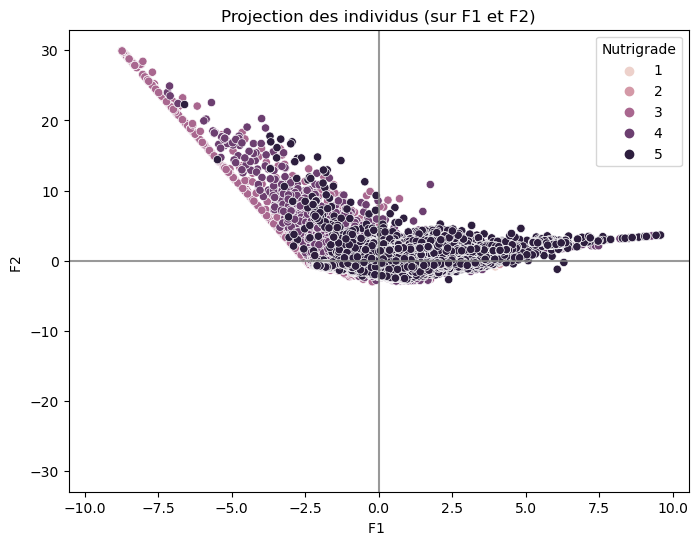

In [136]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y, clusters=Data_Final['Nutrigrade'])

- **Nous pouvons voir l’énergie corrélé positivement à la composante F2.**
- **De plus, les couleurs foncées indiquent une augmentation de l'énergie, ce qui signifie que les couleurs foncées ont une valeur énergétique plus élevée que les autres composants nutritionnels.**

## VI- Test ANOVA

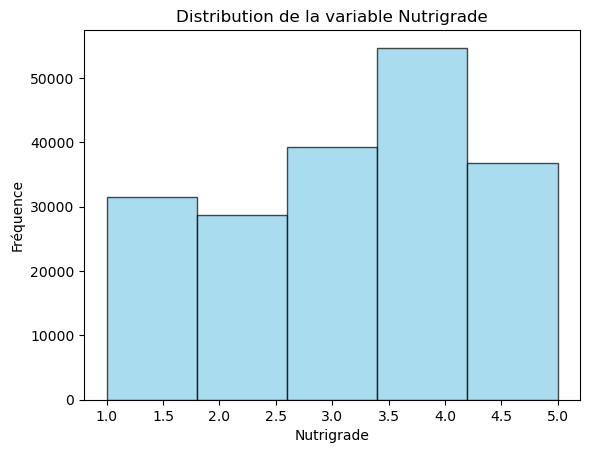

In [137]:
# Créer un histogramme pour la variable 'Nutrigrade'
plt.hist(Data_Final['Nutrigrade'], bins=5, color='skyblue', edgecolor='black', alpha=0.7)

# Ajouter des étiquettes et un titre
plt.xlabel('Nutrigrade')
plt.ylabel('Fréquence')
plt.title('Distribution de la variable Nutrigrade')

# Afficher l'histogramme
plt.show()

In [138]:
Data_Final['pnns_groups_2'].unique()

array(['Fruits', 'Non communiqué', 'One-dish meals', 'Unknown',
       'Milk and yogurt', 'Meat', 'Non-sugared beverages', 'Vegetables',
       'Bread', 'Nuts', 'Legumes', 'Cereals', 'Potatoes',
       'Dressings and sauces', 'Breakfast cereals', 'Soups',
       'Sweetened beverages', 'Fish and seafood', 'Dairy desserts',
       'Eggs', 'Cheese', 'Fats', 'Chocolate products', 'Appetizers',
       'Sweets', 'Sandwich', 'Dried fruits', 'Biscuits and cakes',
       'Pizza pies and quiche', 'Artificially sweetened beverages',
       'Tripe dishes', 'Ice cream', 'Processed meat', 'Fruit juices',
       'Pastries', 'Alcoholic beverages', 'Fruit nectars',
       'Salty and fatty products'], dtype=object)

In [139]:
from scipy.stats import f_oneway

# Créer des sous-ensembles de Data_Final pour chaque catégorie de 'pnns_groups_2'
categories = Data_Final['pnns_groups_2'].unique()

# Initialiser une liste pour stocker les groupes de valeurs de 'proteins_100g' pour chaque catégorie
groups = []

# Remplir la liste 'groups' avec les valeurs correspondantes de 'proteins_100g' pour chaque catégorie
for cat in categories:
    group = Data_Final[Data_Final['pnns_groups_2'] == cat]['proteins_100g']
    groups.append(group)

# Effectuer le test ANOVA
f_statistic, p_value = f_oneway(*groups)

# Afficher les résultats
print("Résultats du test ANOVA:")
print("Statistique F :", f_statistic)
print("P-valeur :", p_value)

Résultats du test ANOVA:
Statistique F : 781.3463322719117
P-valeur : 0.0


- **Le test ANOVA révèle une différence significative entre les moyennes des groupes 'proteins_100g' pour chaque catégorie de 'pnns_groups_2' (F = 781.34, p < 0.001), indiquant que le type de 'pnns_groups_2' a un impact notable sur les valeurs de 'proteins_100g'.**


- **La statistique F élevée (F = 781.34) et la p-valeur très faible (p < 0.001) confirment qu'il existe des variations significatives des 'proteins_100g' entre les différentes catégories de 'pnns_groups_2'.**

In [140]:
# Activation de l'affichage complet des contenus des cellules
pd.set_option('display.max_colwidth', None)

# Processus de nettoyage
# Création d'une liste contenant les informations de l'étape 11
etape14 = ['Etape 14', "Composante Principale (ACP) et ANOVA.", Data_Final.shape[1], 
          Data_Final.shape[0], # Nombre total de colonnes avant la suppression
          round((Data_Final.isna().sum().sum())*100/(Data_Final.shape[0]*Data_Final.shape[1]))]   # Calcul du pourcentage de NaN

# Conversion de la liste en DataFrame avec les bonnes colonnes
etape14 = pd.DataFrame([etape14], columns=['Etapes', 'Action', 'Nb_Colonne', 'Nb_Ligne', 'Pourcentage_NaN'])

# Ajout de l'étape au DataFrame df_processus_nettoyage
df_processus_nettoyage = df_processus_nettoyage.append(etape14, ignore_index=True)

# Afficher le DataFrame mis à jour
df_processus_nettoyage

,Etapes,Action,Nb_Colonne,Nb_Ligne,Pourcentage_NaN
0,Etape 1,Ouverture du Fichier,162,320772,76
1,Etape 2,"Suppression des colonnes ayant moins de 50% de leur valeur rempli, sauf 'pnns_groups_1', 'pnns_groups_2'",36,320772,17
2,Etape 3,Suppression des lignes ne contenant pas d'informations sur les ingrédients,36,262768,9
3,Etape 4,Analyse des variables pour les informations générales,31,259380,11
4,Etape 5,Analyse des variables tags,28,259380,12
5,Etape 6,Analyse des variables Igredients,28,259380,12
6,Etape 7,Analyse des variables Données diverses,22,259380,10
7,Etape 8,Analyse des variables apports nutritionnels,21,259206,10
8,Etape 9,Traitement des colonnes textuelles et élimination des produits sans groupe PNNS2,21,259206,4
9,Etape 10,Génération des variables associées à l'EnvironnementScore.,20,259206,3
